In [1]:
import subprocess
import sys

required_libraries = {
    "pandas": "pandas",
    "numpy": "numpy",
    "klib": "klib",
    "matplotlib": "matplotlib",
    "seaborn": "seaborn",
    "plotly": "plotly",
    "statsmodels": "statsmodels"}

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

for lib, package in required_libraries.items():
    try:
        __import__(lib)
        print(f"{lib} is already installed.")
    except ImportError:
        print(f"{lib} not found, installing...")
        install(package)

print("All libraries are ready.")

pandas is already installed.
numpy is already installed.
klib is already installed.
matplotlib is already installed.
seaborn is already installed.
plotly is already installed.
statsmodels is already installed.
All libraries are ready.


In [2]:
import subprocess
import sys
required_libraries = {
    "pandas": "pandas",
    "numpy": "numpy",
    "klib": "klib",
    "matplotlib": "matplotlib",
    "seaborn": "seaborn",
    "plotly": "plotly",
    "statsmodels": "statsmodels"}
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
for lib, package in required_libraries.items():
    try:
        __import__(lib)
        print(f"{lib} is already installed.")
    except ImportError:
        print(f"{lib} not found, installing...")
        install(package)
print("All libraries are ready.")

pandas is already installed.
numpy is already installed.
klib is already installed.
matplotlib is already installed.
seaborn is already installed.
plotly is already installed.
statsmodels is already installed.
All libraries are ready.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import klib
from sklearn.datasets import load_wine
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns



In [4]:
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [5]:
data = load_wine()
print(data.DESCR)
df = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=['target'])
df = pd.concat([df, df_target], axis=1)

df.head(3)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0

## Wine Dataset Attributes Description

1. **Alcohol**
   - The percentage of alcohol content by volume in the wine.

2. **Malic Acid**
   - An organic acid present in grapes and wines that affects the wine's taste by adding tartness.

3. **Ash**
   - The non-organic residue left after the evaporation and incineration of wine, indicative of the total mineral content.

4. **Alcalinity of Ash**
   - Measures the alkalinity (ability to neutralize acids) of the ash content in the wine, which can affect both color and taste.

5. **Magnesium**
   - The level of magnesium in the wine, an essential element that is vital for the health of the vine and influences the development and flavor of the wine.

6. **Total Phenols**
   - Compounds in wine that include flavonoids and nonflavonoids, affecting color, flavor, and mouthfeel, and contributing to the bitterness and astringency of wine.

7. **Flavanoids**
   - A subgroup of phenols known primarily for their antioxidant activity; in wine, they are a major contributor to the taste and structure.

8. **Nonflavanoid Phenols**
   - Another group of phenolic compounds not classified as flavonoids but still important for the sensory characteristics of wine.

9. **Proanthocyanins**
   - Tannins that influence the color, astringency, and bitterness of the wine. They are flavanoid phenols that also provide health benefits.

10. **Color Intensity**
    - A measure of how deep or intense the color of the wine is, which can indicate the type of wine and the concentration of certain chemical compounds.

11. **Hue**
    - Refers to the color shade or tint of the wine. In red wines, this can indicate age, as younger wines have more vibrant purple hues, and older wines have brick red hues.

12. **OD280/OD315 of Diluted Wines**
    - This ratio measures the absorbance at 280 nm and 315 nm wavelengths in diluted wine samples to assess the wine's phenolic content, especially its tannin structure.

13. **Proline**
    - An amino acid found in higher concentrations in some wines, considered an indicator of wine quality and used to distinguish between different types of wine.


In [6]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming df is your DataFrame and 'target' is the column to predict
# df = pd.read_csv('your_data.csv') # Uncomment this if you need to read from a file

numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
np.random.seed(42)

# Extract the features and the target variable
X = df[numerical_columns].drop(columns=['target'])
y = df['target']

# Build and train the KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Predict on the entire dataset
y_pred = knn.predict(X)

# Generate and display the classification report
report = classification_report(y, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.93      0.92        59
           1       0.91      0.83      0.87        71
           2       0.77      0.85      0.81        48

    accuracy                           0.87       178
   macro avg       0.87      0.87      0.87       178
weighted avg       0.87      0.87      0.87       178



# Data Cleaning
## Goal is to achieve a better

In [8]:
# Renaming column names to have better readability

df = df.rename(columns={'od280/od315_of_diluted_wines':'phenolic_content'})
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'phenolic_content',
       'proline', 'target'],
      dtype='object')

In [9]:
print("Number of rows:", df.shape[0])
print("Number of features:", df.shape[1])

Number of rows: 178
Number of features: 14


## We have 13 Continous variables and also one categorical column which is the target class to predict which contains the class of wine

In [10]:
df.describe().T.style.background_gradient(cmap = "magma")

## Checking for missing values
Using a pkg called klib to check for missing values

In [11]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [12]:
df.dtypes

alcohol                 float64
malic_acid              float64
ash                     float64
alcalinity_of_ash       float64
magnesium               float64
total_phenols           float64
flavanoids              float64
nonflavanoid_phenols    float64
proanthocyanins         float64
color_intensity         float64
hue                     float64
phenolic_content        float64
proline                 float64
target                    int64
dtype: object

# Data exlopration (EDA)

## Checking for class inbalance

In [13]:
df["target"].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

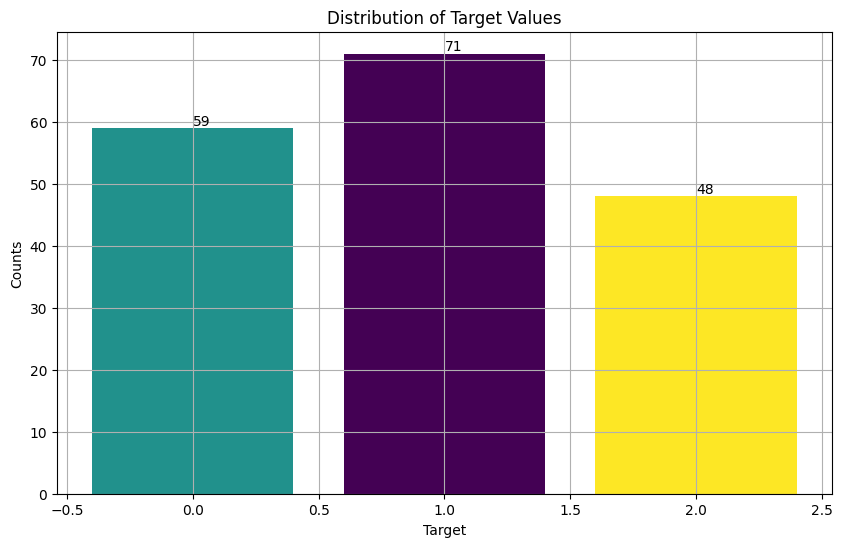

In [14]:
value_counts = df["target"].value_counts()
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(value_counts)))
bars = plt.bar(value_counts.index, value_counts, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

- You can see that class type 1 wine has the highest number of rows and class 2 is the lowest so there is class imbalance present in the data set
- SMOTE analysis can be iused to fix this issue

## Distribustions and skewness

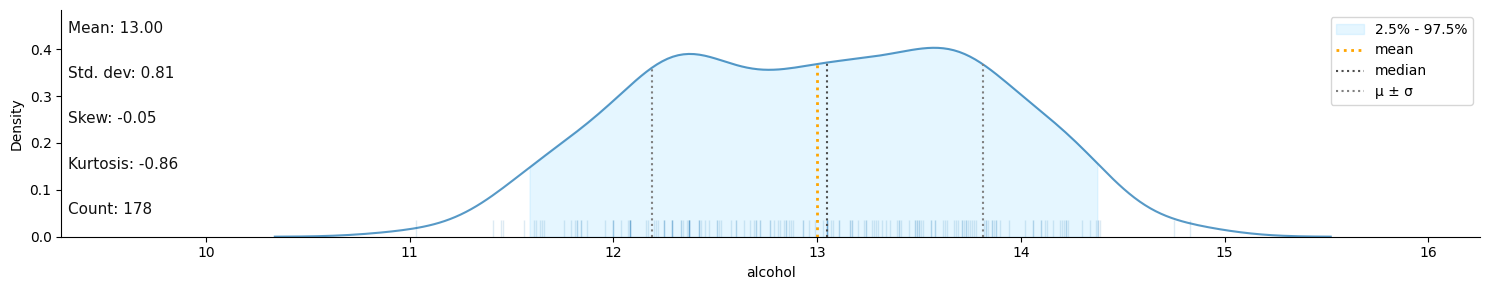

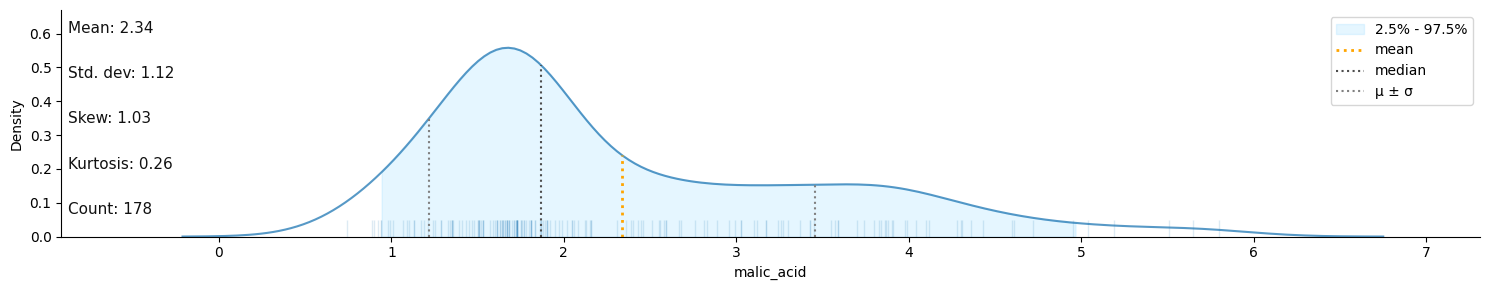

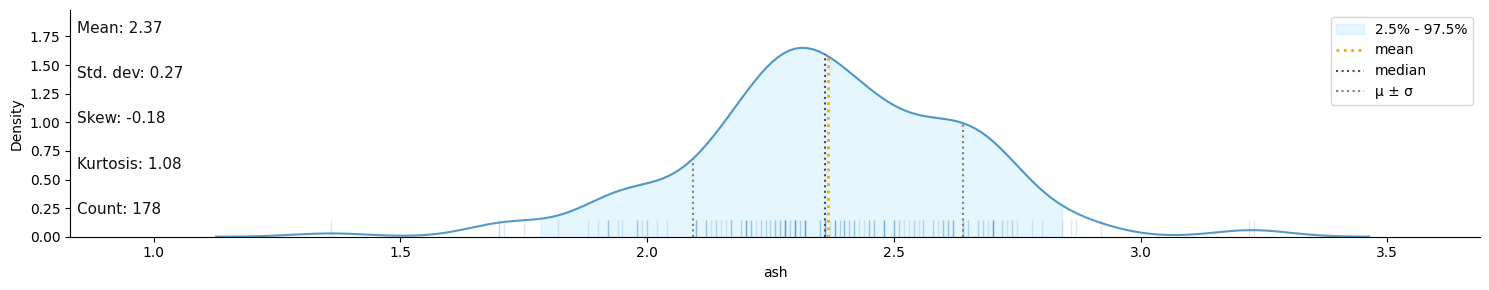

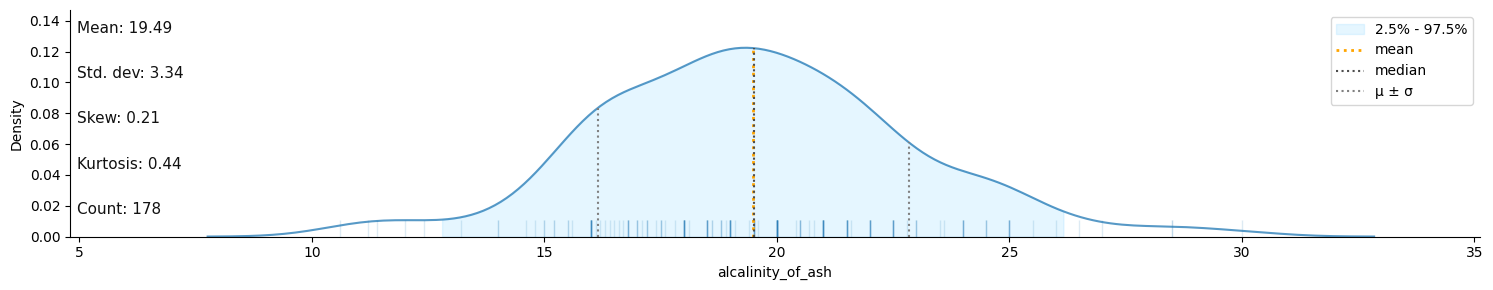

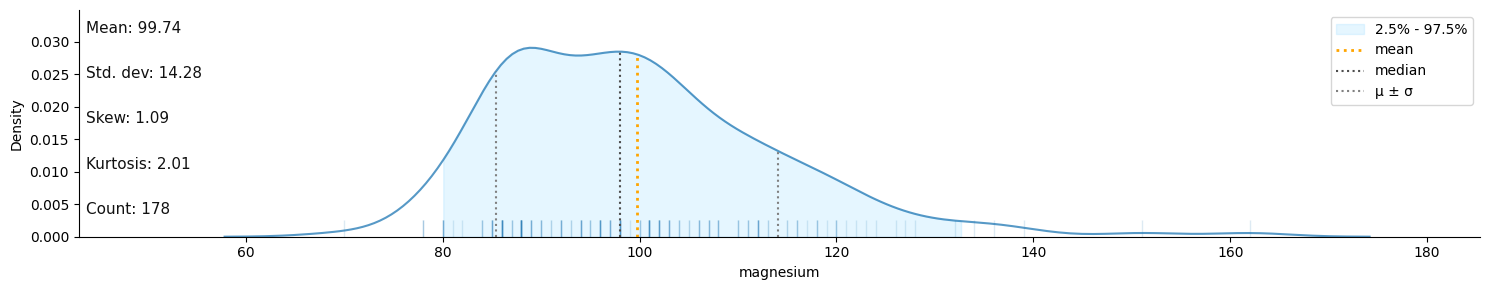

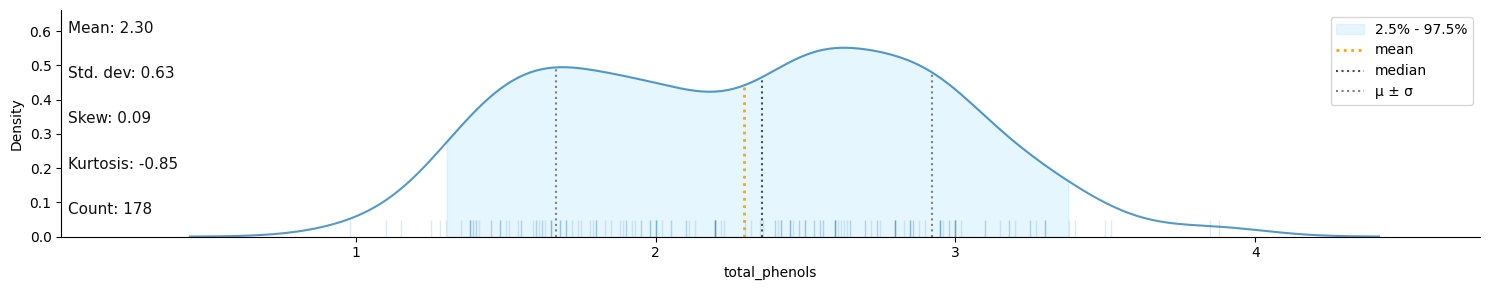

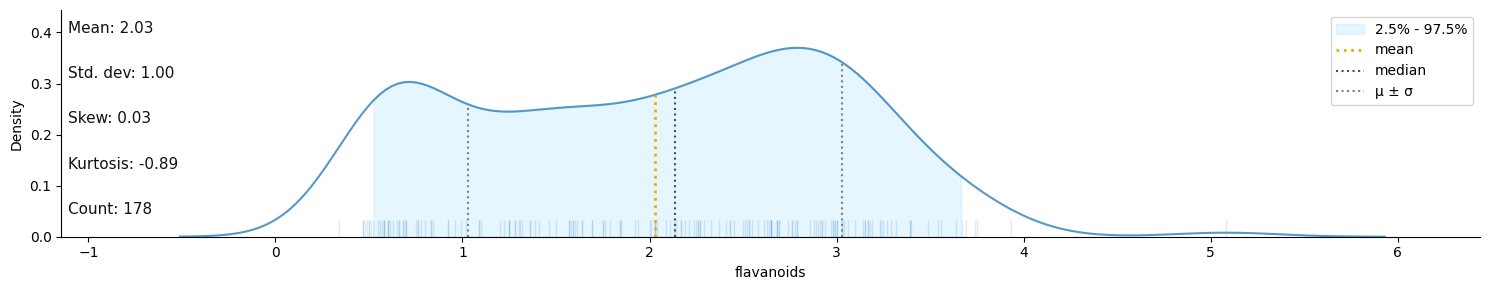

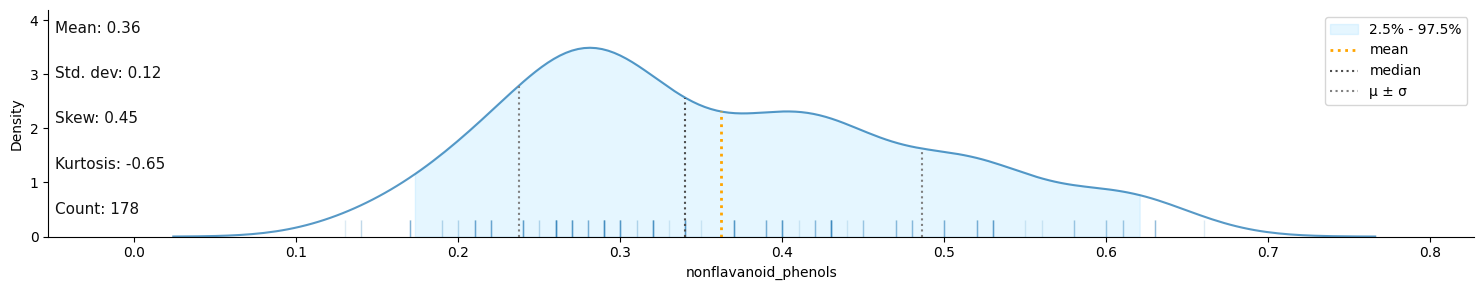

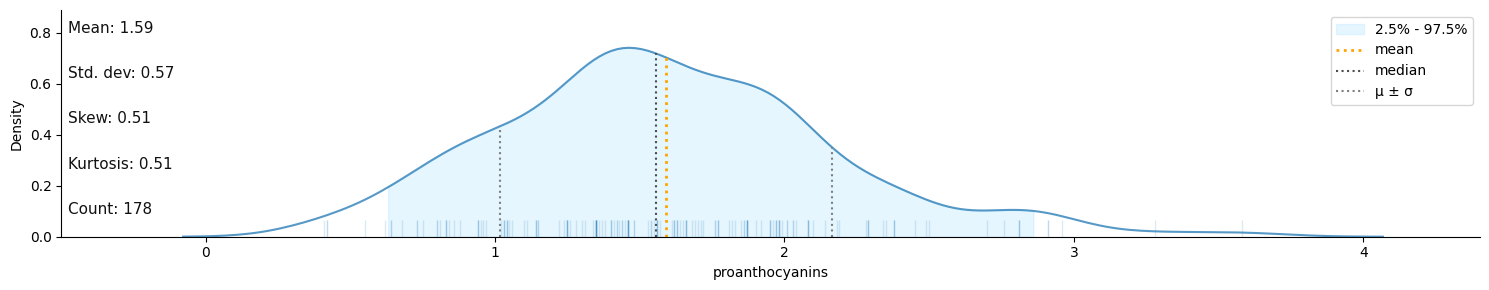

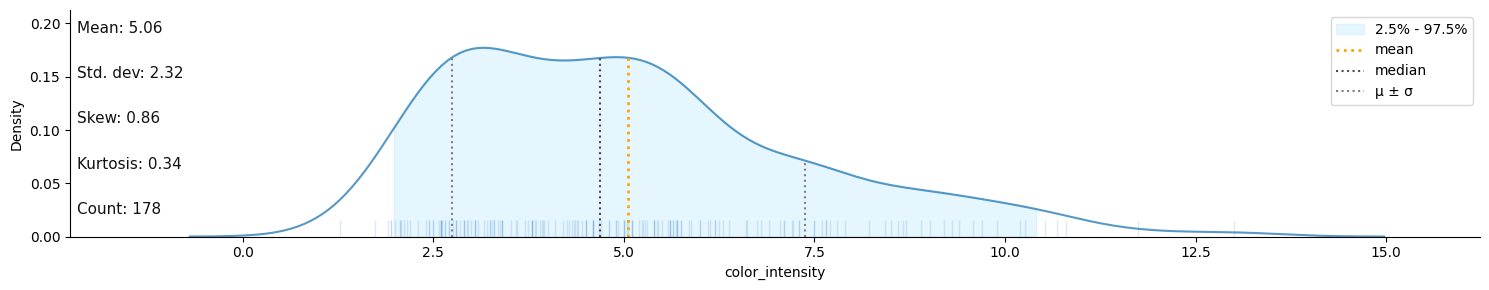

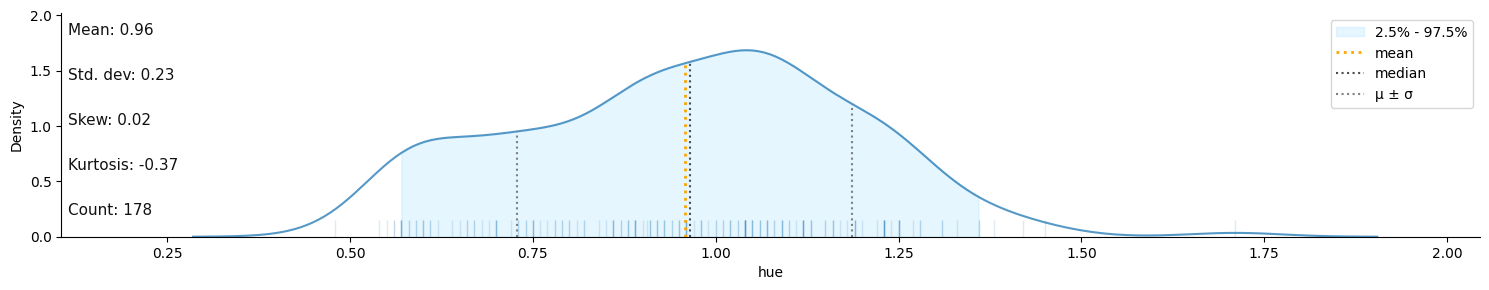

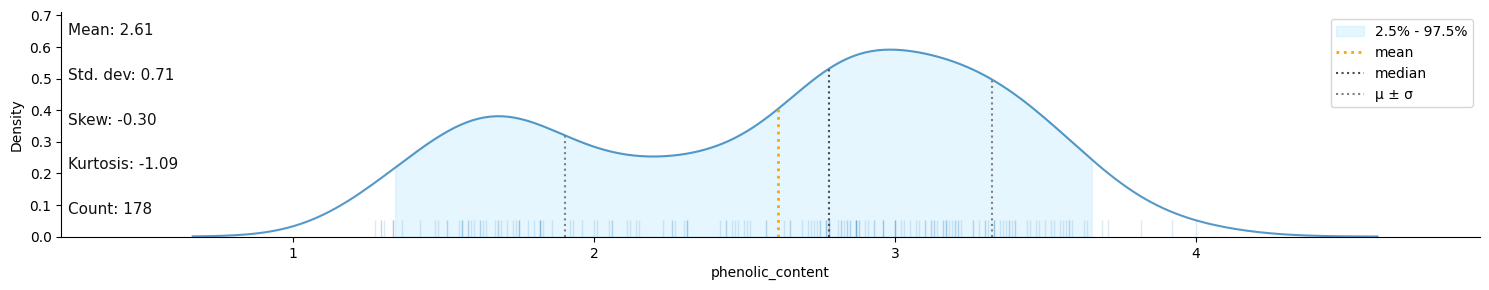

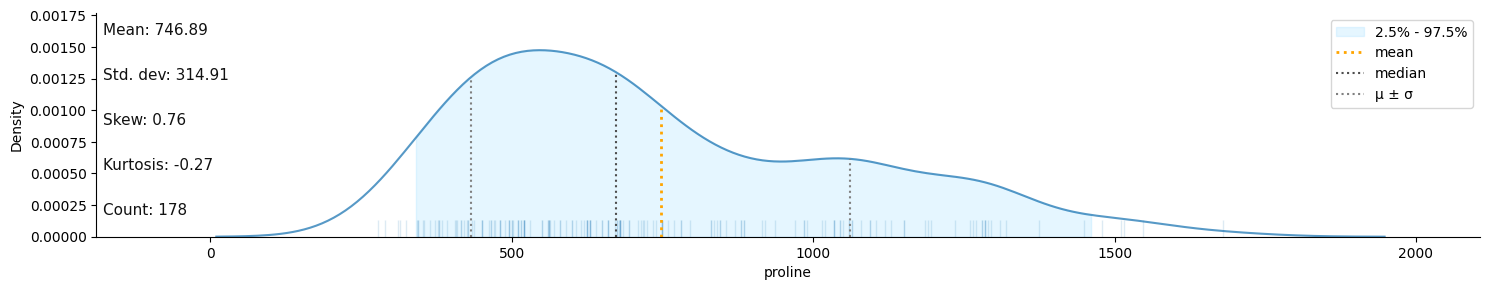

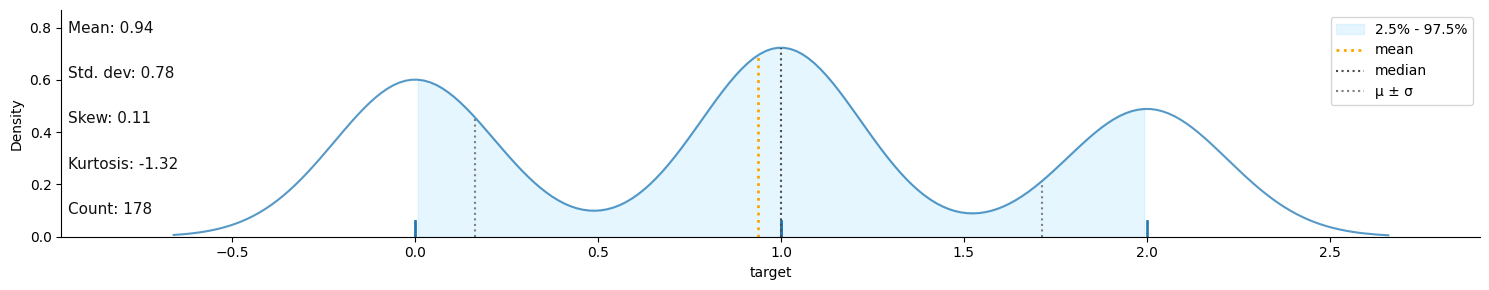

In [15]:
for column in df.columns:
    klib.dist_plot(df[column])

In [16]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'phenolic_content',
       'proline', 'target'],
      dtype='object')

<Axes: xlabel='malic_acid', ylabel='Density'>

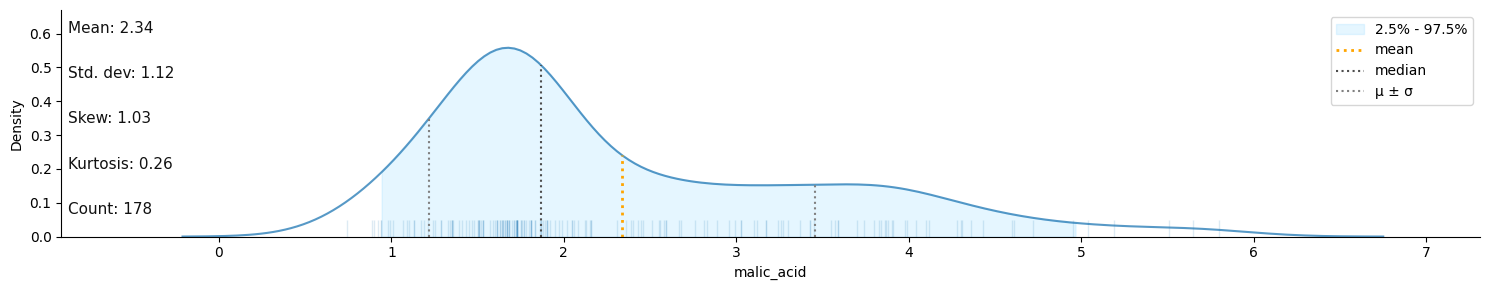

In [17]:
klib.dist_plot(df["malic_acid"])

### Distribution Plot Summary for Malic Acid

- **Mean**: The average value of `malic_acid` is 2.34.
- **Standard Deviation**: The standard deviation is 1.12, indicating the variability around the mean.
- **Skewness**: The skewness coefficient is 1.03, which suggests a right-skewed distribution.
- **Kurtosis**: The kurtosis is 0.26, suggesting a tail distribution similar to a normal distribution.

#### Observations from the Plot
- The distribution of `malic_acid` is not symmetrical and exhibits right-skewness.
- There are outliers present, as evidenced by the extension of the distribution's tail to the right.


<Axes: xlabel='alcohol', ylabel='Density'>

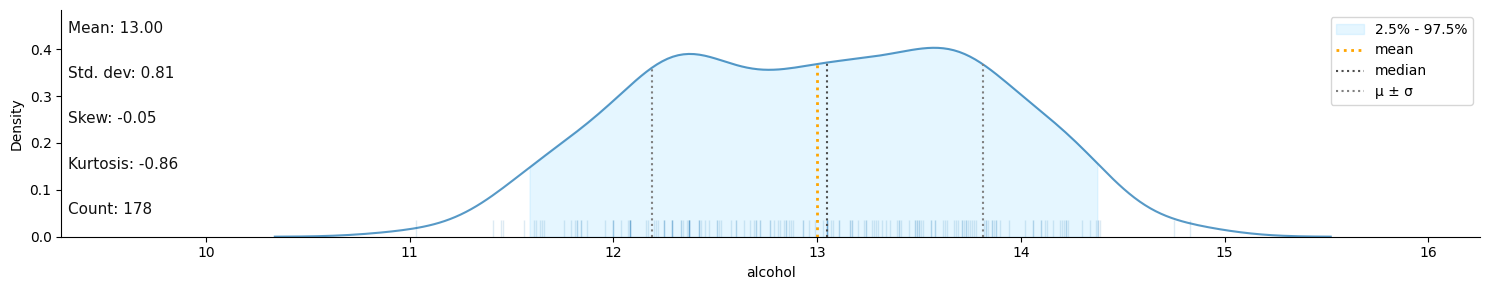

In [18]:
klib.dist_plot(df["alcohol"])

### Distribution Plot Summary for Alcohol

- **Mean**: The mean value of `alcohol` is 13.00, which is the average alcohol content in the dataset.
- **Standard Deviation**: The standard deviation is 0.81, indicating the spread of alcohol content values around the mean.
- **Skewness**: The skewness is -0.05, showing the distribution is nearly symmetrical around the mean.
- **Kurtosis**: The kurtosis is -0.86, suggesting a platykurtic distribution.
- A platykurtic distribution is characterized by a flatter peak and lighter tails compared to a normal distribution. This indicates that the data has fewer extreme outliers and a more moderate spread of values around the mean. Specifically:

- **Platykurtic (Kurtosis < 0)**: The distribution is broader and has less pronounced tails, suggesting less likelihood of extreme values.

### Insights from the Plot
- The `alcohol` distribution is roughly normal with slight platykurtic characteristics, meaning it has a lower peak and thinner tails compared to a normal distribution.

<Axes: xlabel='ash', ylabel='Density'>

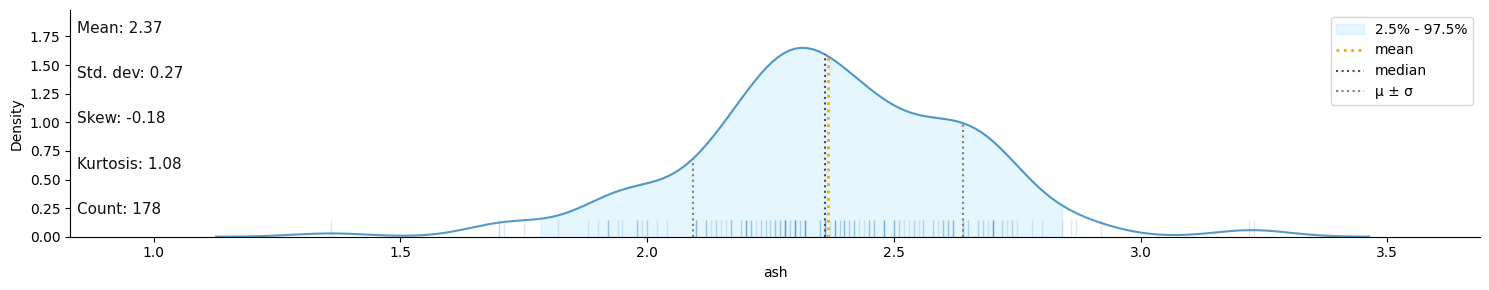

In [19]:
klib.dist_plot(df["ash"])

### Distribution Plot Summary for Ash

- **Mean**: The average value of `ash` is 2.37.
- **Standard Deviation**: The standard deviation is 0.27, indicating variability around the mean.
- **Skewness**: The skewness is -0.18, suggesting a slight leftward skew in the distribution.
- **Kurtosis**: The kurtosis is 1.08, indicating a leptokurtic distribution with a sharper peak than a normal distribution.

#### Interpretation
- The slight left skew suggests a higher frequency of data points below the mean.
- A leptokurtic distribution means there's a strong concentration of values around the mean, leading to a pronounced peak, and potentially heavier tails with more extreme outliers.


<Axes: xlabel='color_intensity', ylabel='Density'>

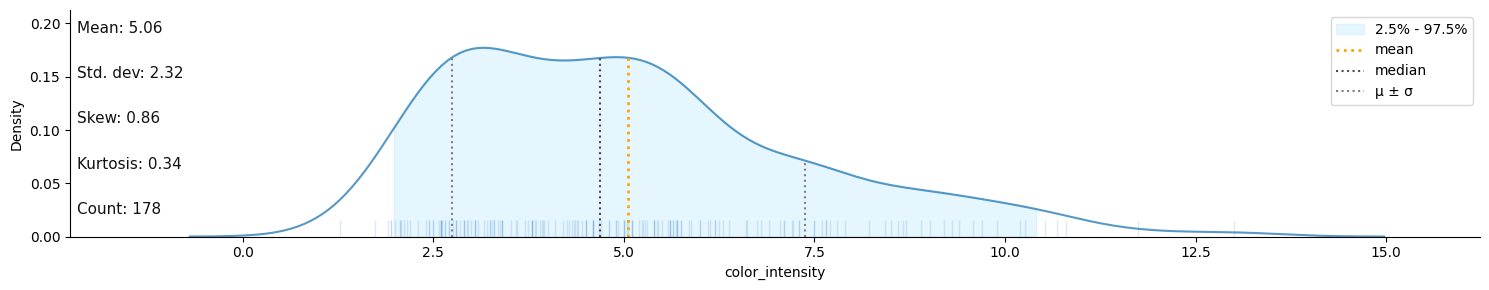

In [20]:
klib.dist_plot(df["color_intensity"])

### Distribution Plot Summary for Color Intensity

- **Mean**: The average value of `color_intensity` is 5.06.
- **Standard Deviation**: The standard deviation is 2.32, showing the spread of color intensity values around the mean.
- **Skewness**: The skewness is 0.86, indicating a rightward skew in the distribution.
- **Kurtosis**: The kurtosis is 0.34, which suggests a slightly heavier tail than a normal distribution, but not extremely so.

#### Interpretation
- The right skew indicates that there are more values on the lower end of color intensity and fewer high values, but those high values stretch further out, as shown by the long right tail.
- The mild kurtosis value indicates that the distribution has slightly more weight in the tails than a normal distribution would, suggesting the presence of some outliers.


### Distribution Plot Summary for Magnesium

- **Mean**: The average value of `magnesium` is 99.74.
- **Standard Deviation**: The standard deviation is 14.28, indicating the spread of magnesium values around the mean.
- **Skewness**: The skewness is 1.09, showing a rightward skew in the distribution.
- **Kurtosis**: The kurtosis is 2.01, which suggests a leptokurtic distribution with a more pronounced peak than a normal distribution.

#### Interpretation
- The distribution of magnesium is skewed to the right, suggesting that there are a number of wines with higher magnesium content that are pulling the mean to the right.
- The leptokurtic nature of the distribution indicates the presence of outliers, with more values in the tails than would be expected in a normal distribution.


<Axes: xlabel='total_phenols', ylabel='Density'>

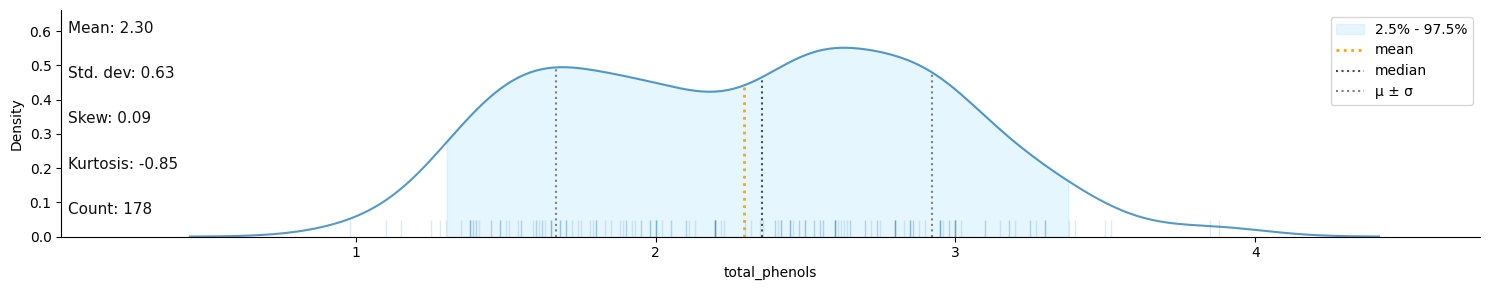

In [21]:
klib.dist_plot(df["total_phenols"])

### Distribution Plot Summary for Total Phenols

- **Mean**: The average value of `total_phenols` is 2.30.
- **Standard Deviation**: The standard deviation is 0.63, which quantifies the amount of variation from the mean.
- **Skewness**: The skewness is 0.09, indicating a distribution that is almost symmetrical.
- **Kurtosis**: The kurtosis is -0.85, suggesting the distribution is platykurtic, with a flatter peak than a normal distribution.

#### Interpretation
- The distribution's near-zero skewness points to a balanced distribution of `total_phenols` around the mean.
- A platykurtic kurtosis value implies that the distribution has lighter tails and is less likely to produce outliers compared to a normal distribution.

#### Potential Bimodality
- The plot shows two peaks, which may indicate a bimodal distribution of `total_phenols`. This suggests the possibility of two underlying groups or processes within the dataset. In the context of wines, these peaks could correspond to different grape varieties, regions, or winemaking techniques that result in varying levels of phenolic content.


<Axes: xlabel='flavanoids', ylabel='Density'>

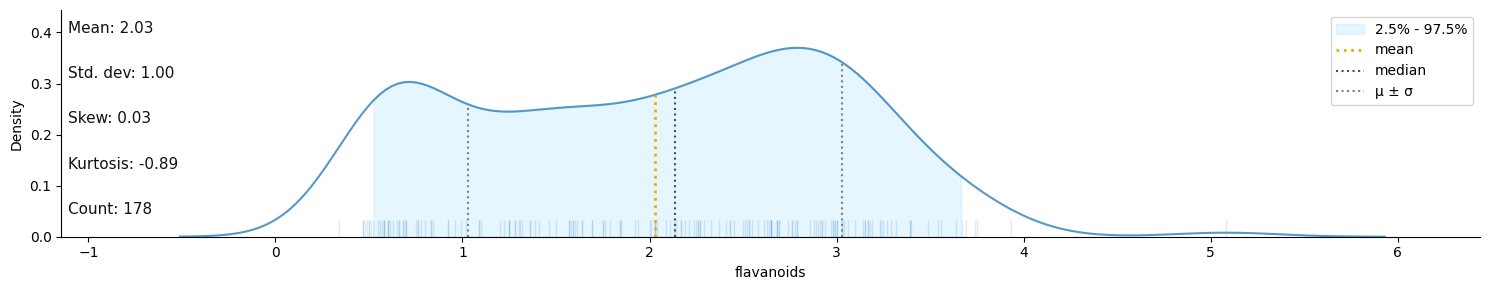

In [22]:
klib.dist_plot(df["flavanoids"])

### Distribution Plot Summary for Flavanoids

- **Mean**: The average value of `flavanoids` is 2.03.
- **Standard Deviation**: The standard deviation is 1.00, indicating the variability of flavanoid values around the mean.
- **Skewness**: The skewness is 0.03, showing that the distribution is very symmetrical.
- **Kurtosis**: The kurtosis is -0.89, which suggests the distribution is platykurtic, with a flatter peak than a normal distribution.

#### Interpretation
- The distribution's near-zero skewness suggests a balanced spread of `flavanoids` around the mean.
- A platykurtic kurtosis value means the distribution is less peaked and has lighter tails than a normal distribution, with fewer extreme values or outliers.

#### Potential Bimodality
- The presence of two peaks in the distribution might suggest bimodality. This could imply that there are two distinct subgroups within the dataset, possibly representing different varieties or categories of wine, each with its own typical flavanoid content.


<Axes: xlabel='nonflavanoid_phenols', ylabel='Density'>

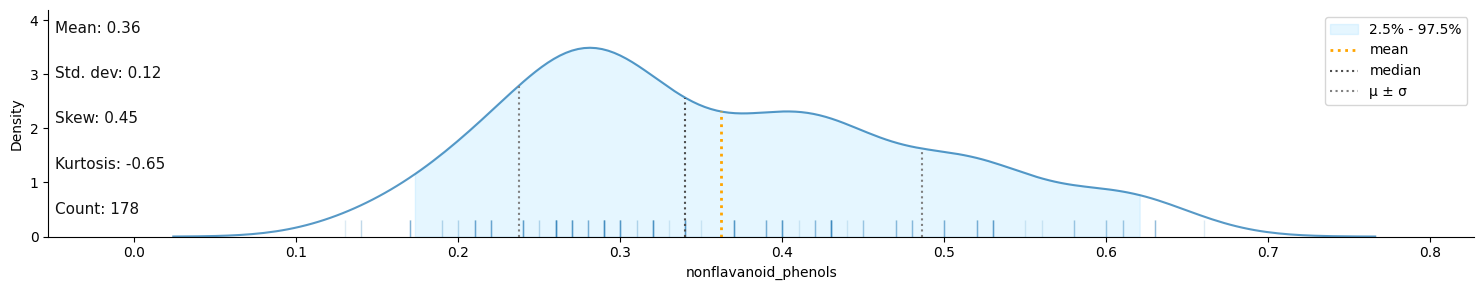

In [23]:
klib.dist_plot(df["nonflavanoid_phenols"])

### Distribution Plot Summary for Nonflavanoid Phenols

- **Mean**: The average value of `nonflavanoid_phenols` is 0.36.
- **Standard Deviation**: The standard deviation is 0.12, reflecting the spread of the data around the mean.
- **Skewness**: The skewness is 0.45, indicating a moderate right skew.
- **Kurtosis**: The kurtosis is -0.65, suggesting that the distribution is somewhat flat-topped (platykurtic).

#### Interpretation
- The moderate right skew suggests that there are more values falling to the left of the mean, with a tail stretching towards the higher end.
- The platykurtic nature of the distribution, with a kurtosis less than 0, indicates fewer outliers and a more moderate peak compared to a normal distribution.


<Axes: xlabel='proanthocyanins', ylabel='Density'>

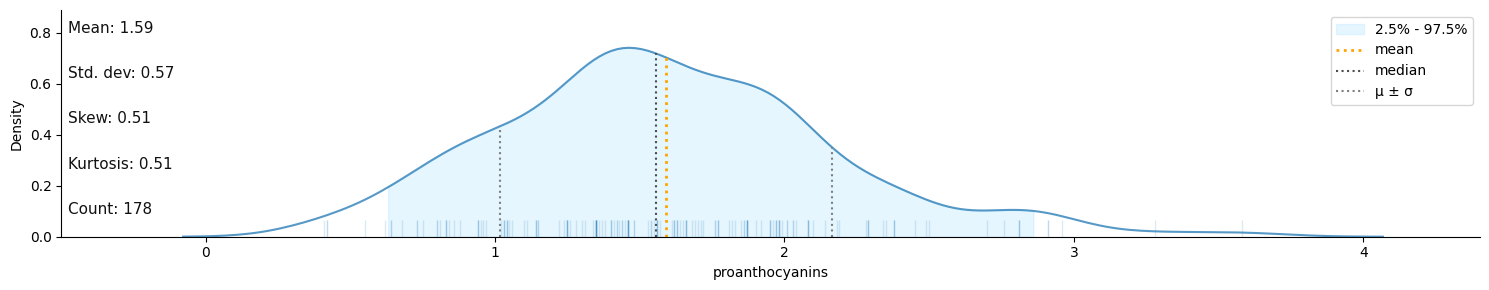

In [24]:
klib.dist_plot(df["proanthocyanins"])

### Distribution Plot Summary for Proanthocyanins

- **Mean**: The average value of `proanthocyanins` is 1.59.
- **Standard Deviation**: The standard deviation is 0.57, indicating how much the values deviate from the mean on average.
- **Skewness**: The skewness is 0.51, showing a moderate skew to the right.
- **Kurtosis**: The kurtosis is 0.51, suggesting a slightly heavier tail than a normal distribution, but not extremely leptokurtic.

#### Interpretation
- The positive skewness indicates that there are more data points on the lower end of the scale with a tail extending towards higher values.
- The slight positive kurtosis indicates that the distribution has a modestly sharp peak with somewhat heavier tails, potentially indicating a small number of outliers.


<Axes: xlabel='alcalinity_of_ash', ylabel='Density'>

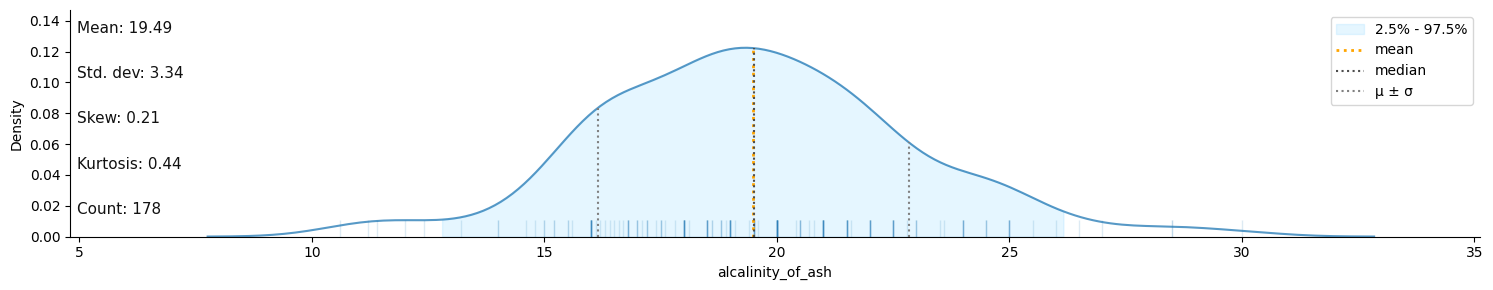

In [25]:
klib.dist_plot(df["alcalinity_of_ash"])

### Distribution Plot Summary for Alkalinity of Ash

- **Mean**: The mean value of `alkalinity_of_ash` is 19.49.
- **Standard Deviation**: The standard deviation is 3.34, indicating the spread of values around the mean.
- **Skewness**: The skewness is 0.21, suggesting a slight skew to the right.
- **Kurtosis**: The kurtosis is 0.44, which indicates a very slight tendency toward heavier tails than a normal distribution.

#### Interpretation
- The skewness being positive but close to zero implies a small number of values are distributed towards the higher end of the range.
- The kurtosis value closer to zero suggests the distribution is relatively normal, with a modest peak and slight presence of outliers.


<Axes: xlabel='hue', ylabel='Density'>

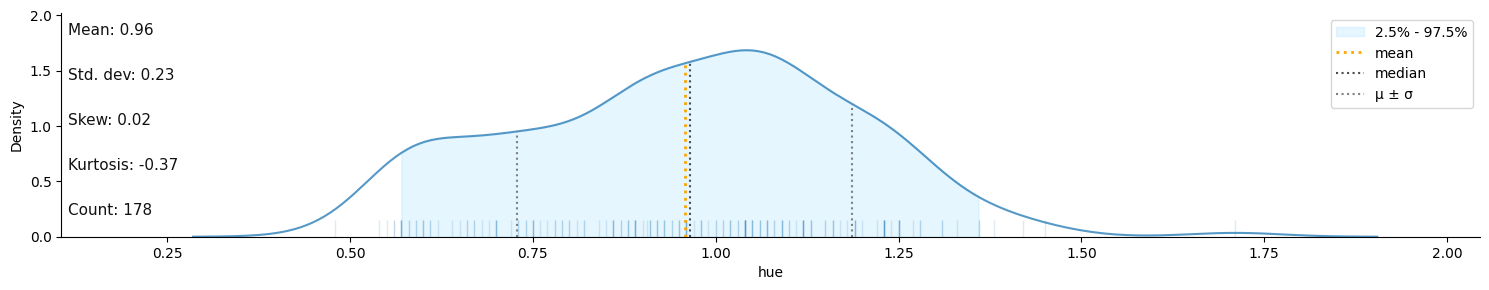

In [26]:
klib.dist_plot(df["hue"])

### Distribution Plot Summary for Hue

- **Mean**: The average value of `hue` is 0.96.
- **Standard Deviation**: The standard deviation is 0.23, showing the variation of hue values from the mean.
- **Skewness**: The skewness is 0.02, indicating that the distribution is almost perfectly symmetrical.
- **Kurtosis**: The kurtosis is -0.37, suggesting the distribution is slightly platykurtic with a flatter peak than a normal distribution.

#### Interpretation
- With a skewness value near zero, the hue distribution appears to be very well balanced on both sides of the mean.
- The slightly negative kurtosis indicates a distribution with light tails, implying fewer extreme values at both ends of the distribution.


<Axes: xlabel='phenolic_content', ylabel='Density'>

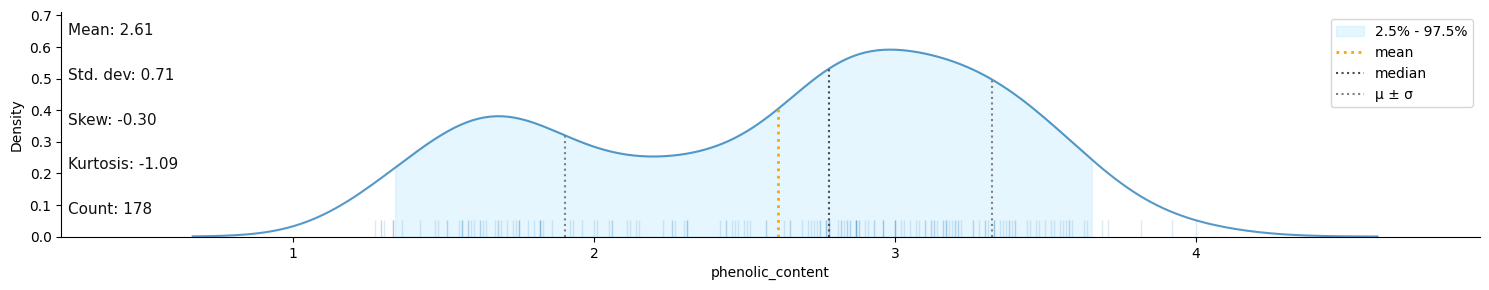

In [27]:
klib.dist_plot(df["phenolic_content"])

### Distribution Plot Summary for Phenolic Content

- **Mean**: The mean value of `phenolic_content` is 2.61.
- **Standard Deviation**: The standard deviation is 0.71, indicating the variability of the phenolic content in the dataset.
- **Skewness**: The skewness is -0.30, showing a slight leftward skew.
- **Kurtosis**: The kurtosis is -1.09, which points to a platykurtic distribution with a flatter peak.

#### Interpretation
- The distribution's slight left skew implies that there are more wines with lower phenolic content.
- The platykurtic kurtosis value, being negative, suggests a relatively flat distribution with light tails and fewer outliers.

#### Potential Bimodality
- The visible two peaks in the distribution suggest bimodality, indicating that the dataset may have two different groups of wine characterized by their phenolic content levels. This could be due to different grape varieties, wine styles, or processing methods that result in different levels of phenolic compounds.


<Axes: xlabel='proline', ylabel='Density'>

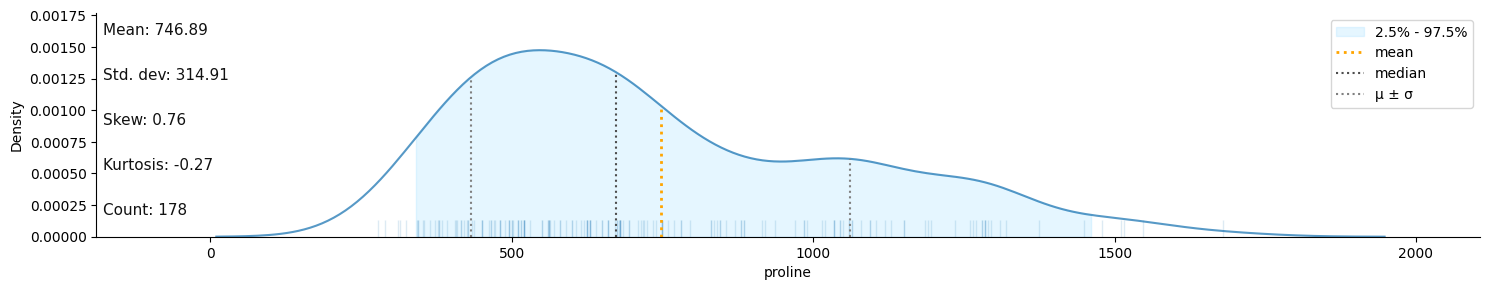

In [28]:
klib.dist_plot(df["proline"])

### Distribution Plot Summary for Proline

- **Mean**: The mean value of `proline` is 746.89.
- **Standard Deviation**: The standard deviation is 314.91, which shows a significant variability in proline content.
- **Skewness**: The skewness is 0.76, indicating a moderate right skew in the distribution.
- **Kurtosis**: The kurtosis is -0.27, suggesting a slightly platykurtic distribution with a flatter peak than a normal distribution.

#### Interpretation
- The moderate right skewness suggests that there is a longer tail of wines with higher proline content stretching to the right, while most of the wines have a lower proline content.
- The slightly negative kurtosis indicates a flatter distribution with fewer extreme values than what would be expected in a normal distribution.


## Conclusion on the Wine Dataset Analysis

The Wine dataset's exploration reveals intricate distribution patterns across various chemical constituents, highlighting the complexity of wine's composition. Key observations include:

### Variable Distribution
- Attributes such as `malic_acid`, `color_intensity`, and `proline` exhibit **noticeable right skewness**, while `phenolic_content` displays a **slight left skew**.
- Such **skewness may impact statistical analysis and model performance**, particularly as many statistical tests assume normality.

### Presence of Outliers
- The potential outliers in variables like `malic_acid`, `ash`, `magnesium`, `color_intensity`, and `proline` might represent **unique wine characteristics** or **data inaccuracies**.
- **Further investigation is necessary** to decide on the correct approach to handling these outliers.

### Kurtosis Analysis
- Distributions for `ash` and `proanthocyanins` are **platykurtic**, suggesting **lighter tails** than a normal distribution.
- `Phenolic_content` has **negative kurtosis**, indicative of a **broader, flatter distribution**.

### Bimodality
- There are signs of **bimodality** in the distributions of `total_phenols`, `flavanoids` and `phenolic_content` which could point to **distinct subgroups** within the wine samples.
- This bimodality could correspond to different **grape varieties or fermentation processes**.



## Box plots
- To look for potentianl outliers from our distrubution analysis
- See trends based on the target varible for all the features

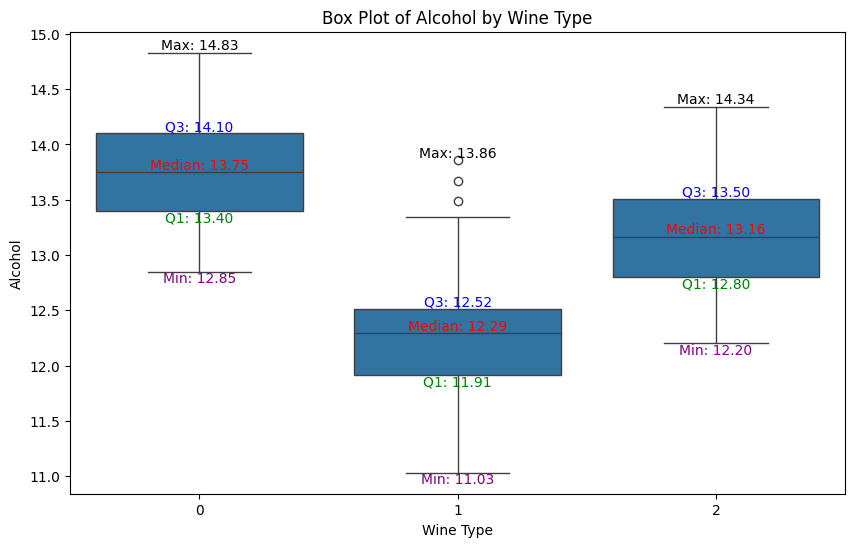

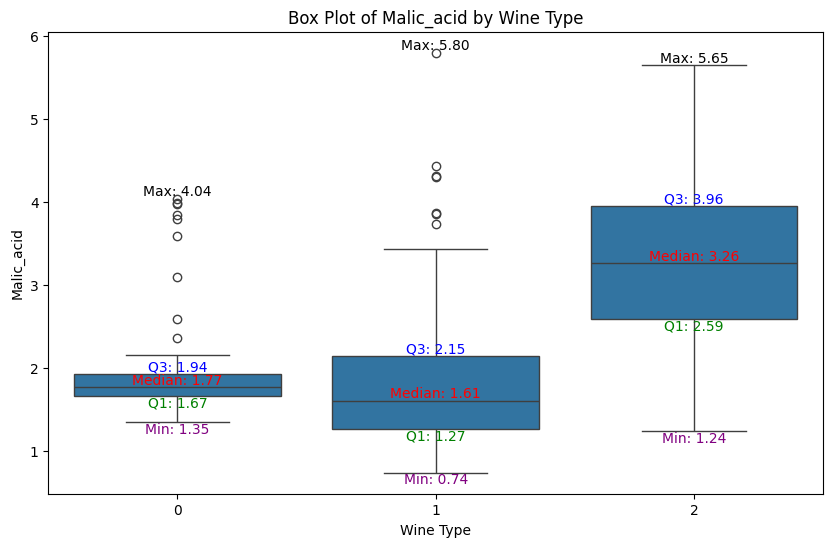

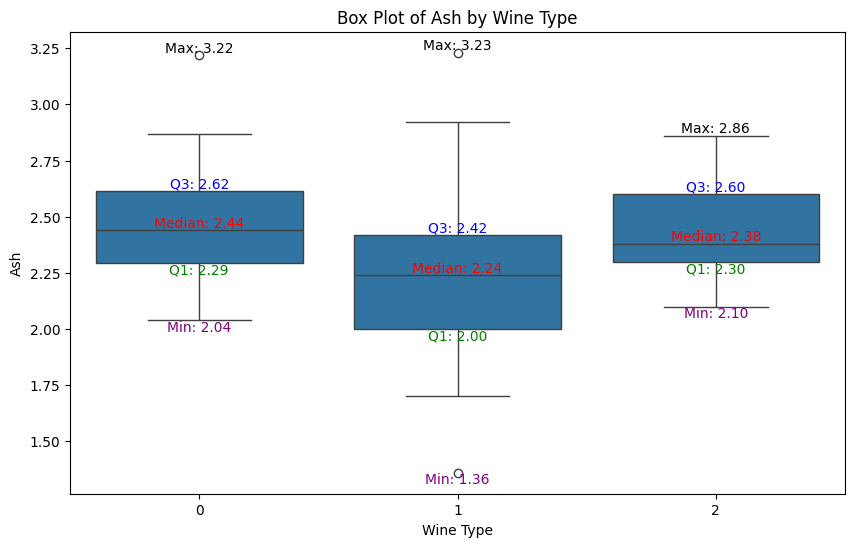

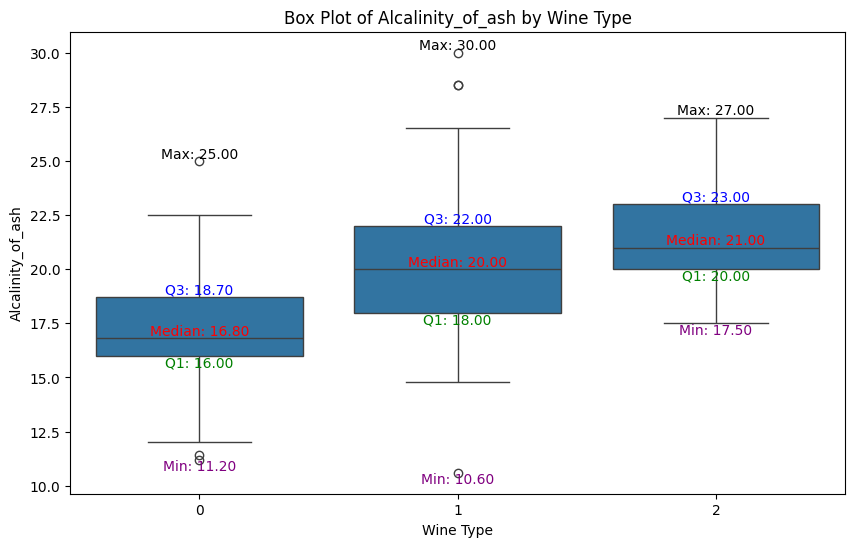

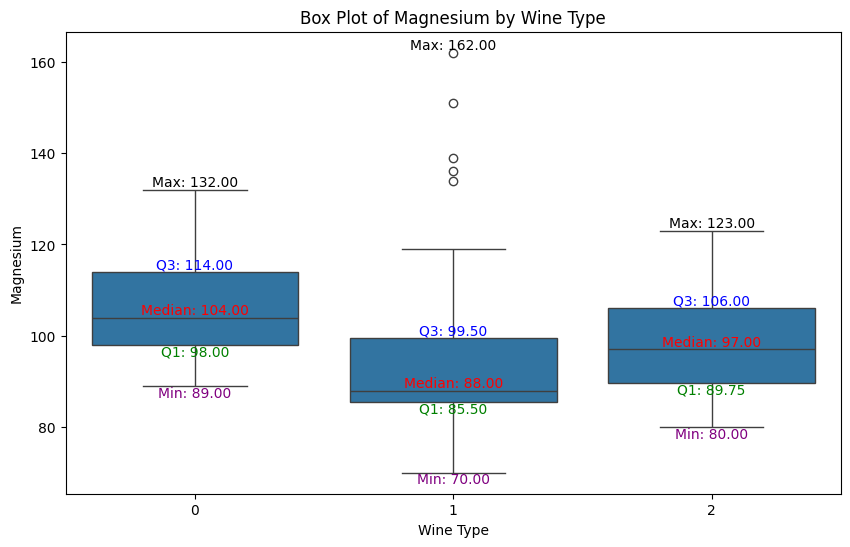

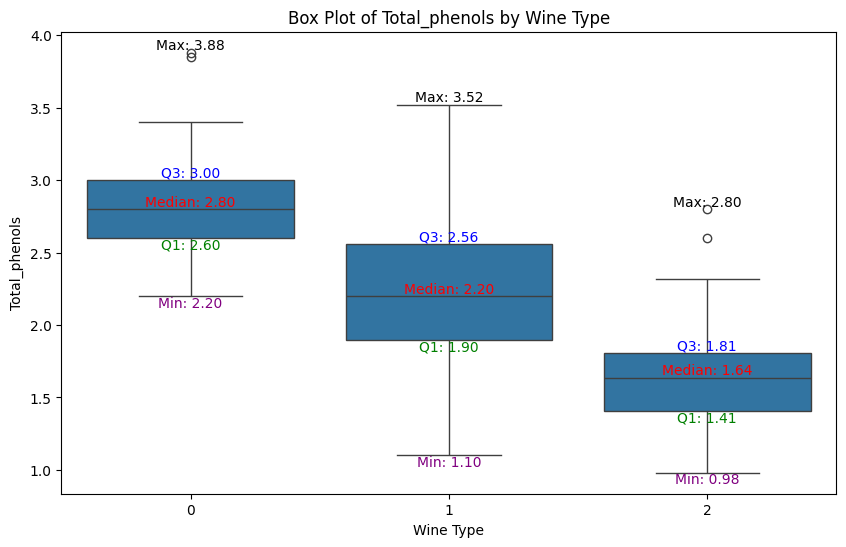

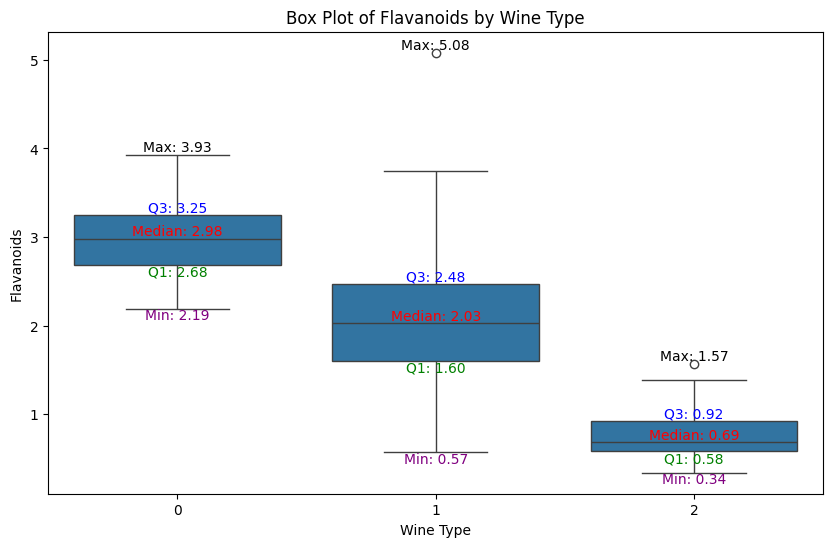

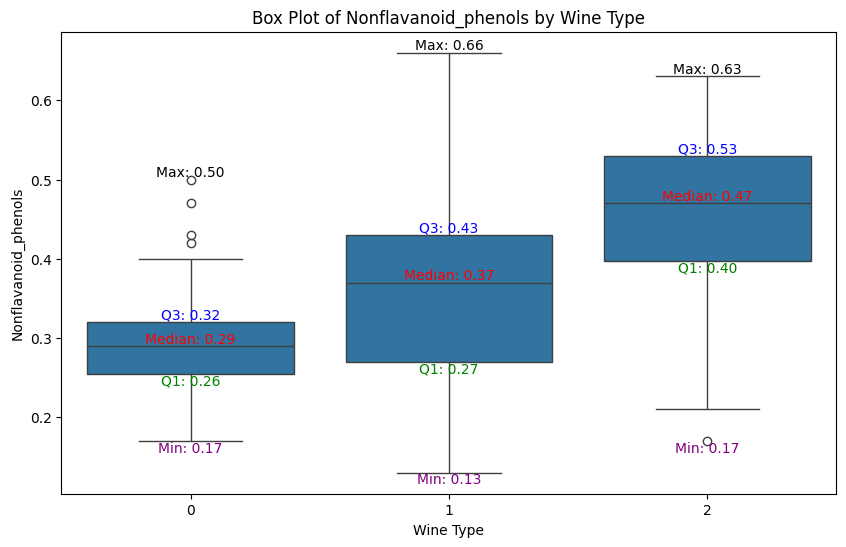

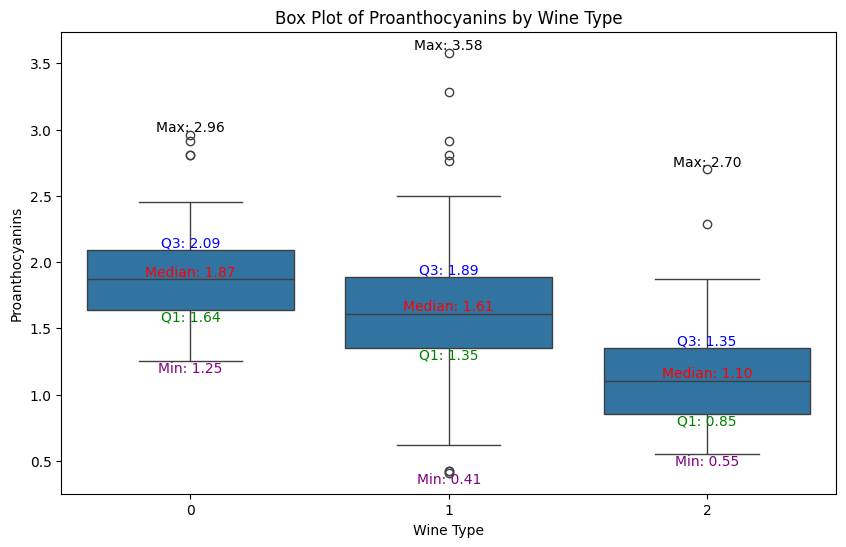

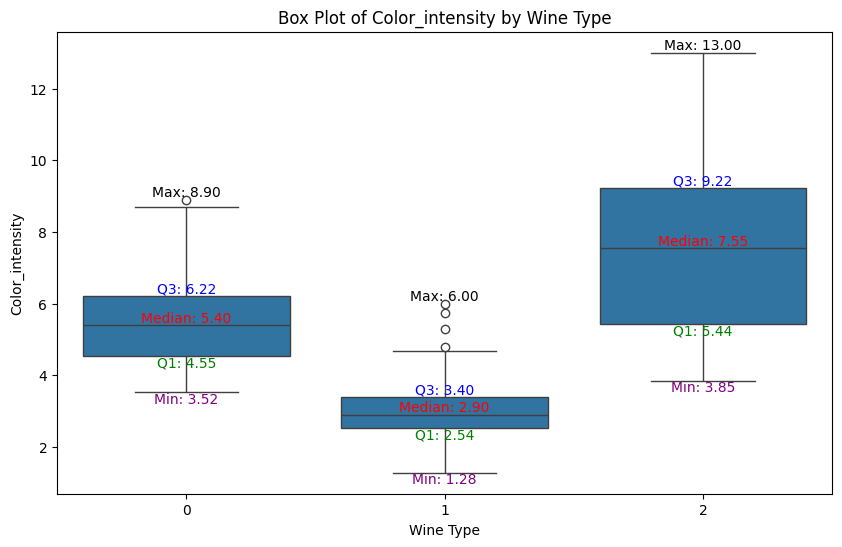

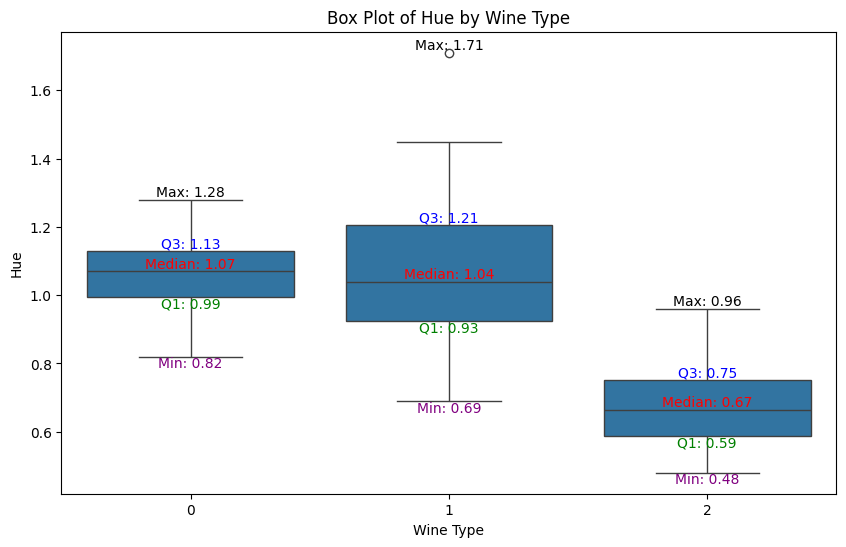

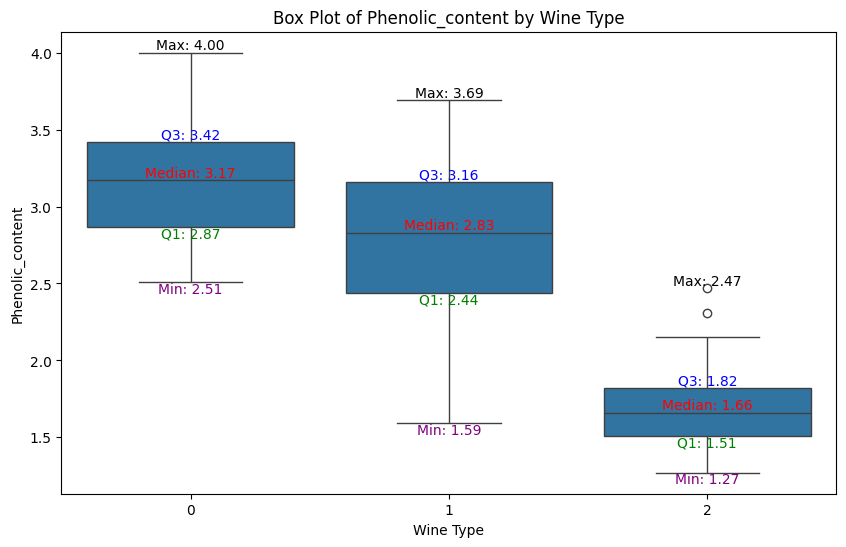

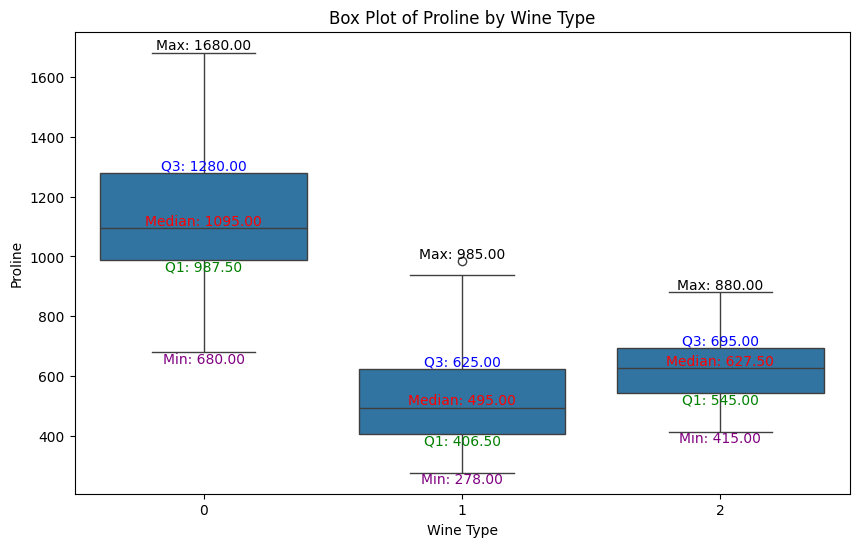

In [29]:
target = df["target"]
for feature in df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=feature, data=df)
    desc_stats = df.groupby('target')[feature].describe()
    for i, stat in enumerate(desc_stats.index):
        plt.text(i, desc_stats.loc[stat, '75%'], f"Q3: {desc_stats.loc[stat, '75%']:.2f}", horizontalalignment='center', verticalalignment='bottom', color='blue')
        plt.text(i, desc_stats.loc[stat, '50%'], f"Median: {desc_stats.loc[stat, '50%']:.2f}", horizontalalignment='center', verticalalignment='bottom', color='red')
        plt.text(i, desc_stats.loc[stat, '25%'], f"Q1: {desc_stats.loc[stat, '25%']:.2f}", horizontalalignment='center', verticalalignment='top', color='green')
        plt.text(i, desc_stats.loc[stat, 'max'], f"Max: {desc_stats.loc[stat, 'max']:.2f}", horizontalalignment='center', verticalalignment='bottom', color='black')
        plt.text(i, desc_stats.loc[stat, 'min'], f"Min: {desc_stats.loc[stat, 'min']:.2f}", horizontalalignment='center', verticalalignment='top', color='purple')
    plt.title(f"Box Plot of {feature.capitalize()} by Wine Type")
    plt.xlabel("Wine Type")
    plt.ylabel(feature.capitalize())

    plt.show()


In [30]:

df['target'] = data.target

for column in df.columns[:-1]:
    fig = px.box(df, y=column, color="target",
                 title=f"Box Plot of {column} by Wine Type",
                 labels={"target": "Wine Type"},
                 points="all",
                 hover_data={'index': df.index})
    fig.update_traces(quartilemethod="inclusive")
    fig.show()


### Outlier detection using IQR


In [31]:
outliers = pd.DataFrame(columns=['Feature', 'Outliers'])

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    counts = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    outlier_row = pd.DataFrame({'Feature': [column], 'Outliers': [counts]})
    outliers = pd.concat([outliers, outlier_row], ignore_index=True)

print(outliers)

                 Feature Outliers
0                alcohol        0
1             malic_acid        3
2                    ash        3
3      alcalinity_of_ash        4
4              magnesium        4
5          total_phenols        0
6             flavanoids        0
7   nonflavanoid_phenols        0
8        proanthocyanins        2
9        color_intensity        4
10                   hue        1
11      phenolic_content        0
12               proline        0
13                target        0


In [32]:
outliers = pd.DataFrame(columns=['Feature', 'Outliers', 'Outlier_indices', 'Outlier_rows'])

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
    outlier_rows = df.iloc[outlier_indices]
    counts = len(outlier_indices)
    outlier_row = pd.DataFrame({'Feature': [column], 'Outliers': [counts], 'Outlier_indices': [outlier_indices], 'Outlier_rows': [outlier_rows]})
    outliers = pd.concat([outliers, outlier_row], ignore_index=True)

outlier_data = pd.DataFrame()

for indices_list in outliers['Outlier_indices']:
    outlier_data = pd.concat([outlier_data, df.iloc[indices_list]])

outlier_data.reset_index(drop=True, inplace=True)

#outlier_data.sort_values(by=["target"] )

In [33]:
outliers = pd.DataFrame(columns=['Feature', 'Outliers', 'Outlier_indices', 'Outlier_rows', 'Outlier_features'])

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
    outlier_rows = df.iloc[outlier_indices]
    outlier_features = [column] * len(outlier_indices)
    counts = len(outlier_indices)
    outlier_row = pd.DataFrame({'Feature': [column], 'Outliers': [counts], 'Outlier_indices': [outlier_indices], 'Outlier_rows': [outlier_rows], 'Outlier_features': [outlier_features]})
    outliers = pd.concat([outliers, outlier_row], ignore_index=True)

outlier_data = pd.DataFrame()

for indices_list, feature_list in zip(outliers['Outlier_indices'], outliers['Outlier_features']):
    feature_data = pd.DataFrame({'Outlier_indices': indices_list, 'Outlier_features': feature_list})
    outlier_data = pd.concat([outlier_data, feature_data])

outlier_data = pd.merge(outlier_data, df, left_on='Outlier_indices', right_index=True)

outlier_data.reset_index(drop=True, inplace=True)

outlier_data.sort_values(by=["target"], inplace=True)

outlier_data = outlier_data.reindex(columns=['Outlier_indices', 'Outlier_features', 'target', 'alcohol', 'malic_acid', 'ash',
       'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids',
       'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue',
       'phenolic_content', 'proline'])

outlier_data.sort_values(by=["Outlier_features","target"], inplace=True)


### Looking at the rows which are outlier and which class do they belong to and which is the outlier feature

In [34]:
outlier_data

Outlier_indices   Outlier_features  target  alcohol  malic_acid   ash  \
9             127.0  alcalinity_of_ash       1    11.79        2.13  2.78   
7              73.0  alcalinity_of_ash       1    12.99        1.67  2.60   
6              59.0  alcalinity_of_ash       1    12.37        0.94  1.36   
8             121.0  alcalinity_of_ash       1    11.56        2.05  3.23   
3              25.0                ash       0    13.05        2.05  3.22   
5             121.0                ash       1    11.56        2.05  3.23   
4              59.0                ash       1    12.37        0.94  1.36   
19            166.0    color_intensity       2    13.45        3.70  2.60   
16            151.0    color_intensity       2    12.79        2.67  2.48   
17            158.0    color_intensity       2    14.34        1.68  2.70   
18            159.0    color_intensity       2    13.48        1.67  2.64   
20            115.0                hue       1    11.03        1.51  2.20   
13             95.0          magnesium       1    12.47        1.52  2.20   
12             78.0          magnesium       1    12.33        0.99  1.95   
11             73.0          magnesium       1    12.99        1.67  2.60   
10             69.0          magnesium       1    12.21        1.19  1.75   
0             123.0         malic_acid       1    13.05        5.80  2.13   
2             173.0         malic_acid       2    13.71        5.65  2.45   
1             137.0         malic_acid       2    12.53        5.51  2.64   
15            110.0    proanthocyanins       1    11.46        3.74  1.82   
14             95.0    proanthocyanins       1    12.47        1.52  2.20   

    alcalinity_of_ash  magnesium  total_phenols  flavanoids  \
9                28.5       92.0           2.13        2.24   
7                30.0      139.0           3.30        2.89   
6                10.6       88.0           1.98        0.57   
8                28.5      119.0           3.18        5.08   
3                25.0      124.0           2.63        2.68   
5                28.5      119.0           3.18        5.08   
4                10.6       88.0           1.98        0.57   
19               23.0      111.0           1.70        0.92   
16               22.0      112.0           1.48        1.36   
17               25.0       98.0           2.80        1.31   
18               22.5       89.0           2.60        1.10   
20               21.5       85.0           2.46        2.17   
13               19.0      162.0           2.50        2.27   
12               14.8      136.0           1.90        1.85   
11               30.0      139.0           3.30        2.89   
10               16.8      151.0           1.85        1.28   
0                21.5       86.0           2.62        2.65   
2                20.5       95.0           1.68        0.61   
1                25.0       96.0           1.79        0.60   
15               19.5      107.0           3.18        2.58   
14               19.0      162.0           2.50        2.27   

    nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
9                   0.58             1.76             3.00  0.97   
7                   0.21             1.96             3.35  1.31   
6                   0.28             0.42             1.95  1.05   
8                   0.47             1.87             6.00  0.93   
3                   0.47             1.92             3.58  1.13   
5                   0.47             1.87             6.00  0.93   
4                   0.28             0.42             1.95  1.05   
19                  0.43             1.46            10.68  0.85   
16                  0.24             1.26            10.80  0.48   
17                  0.53             2.70            13.00  0.57   
18                  0.52             2.29            11.75  0.57   
20                  0.52             2.01             1.90  1.71   
13                  0.32             3

###  We can see that row 59 seems to have outlier for ash related faetures maybe this can be incorrect data

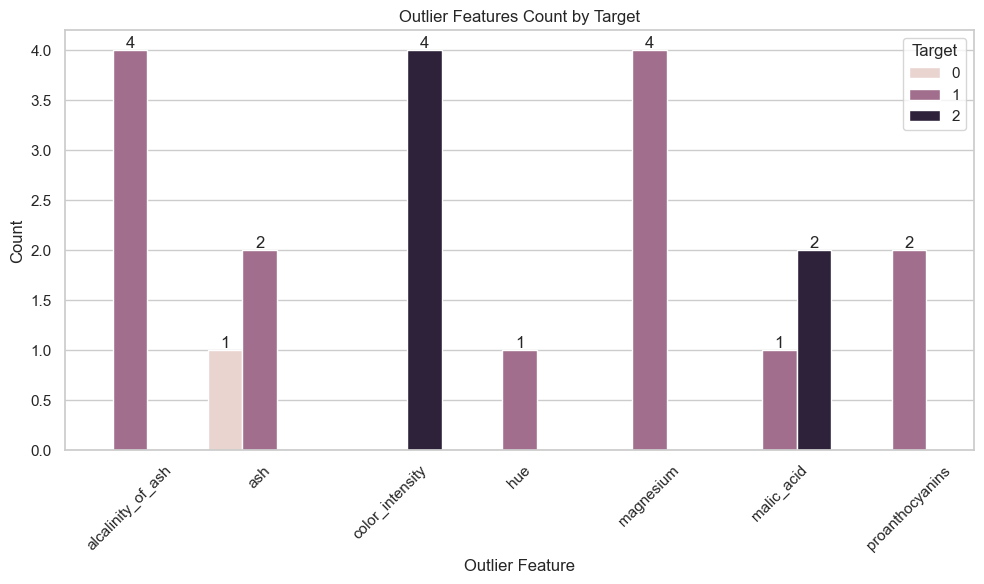

In [35]:

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=outlier_data, x='Outlier_features', hue='target')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points')

plt.title('Outlier Features Count by Target')
plt.xlabel('Outlier Feature')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.tight_layout()
plt.show()


#### We can see that type 0 has only one outlier
- Lets drop this value

In [36]:
df = df.drop(index=3)

In [37]:
df_1 = df.copy()

In [38]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
4      13.24        2.59  2.87               21.0      118.0           2.80   
5      14.20        1.76  2.45               15.2      112.0           3.27   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
4          2.69                  0.39             1.82             4.32  1.04   
5          3.39                  0.34             1.97             6.75  1.05   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     phenolic_content  proline  target  
0                3.92   1065.0       0  
1                3.40   1050.0       0  
2                3.17   1185.0       0  
4                2.93    735.0       0  
5                2.85   1450.0       0  
..                ...      ...     ...  
173              1.74    740.0       2  
174              1.56    750.0       2  
175              1.56    835.0       2  
176              1.62    840.0       2  
177              1.60    560.0       2  

[177 rows x 14 columns]

# Outlier Treatment

- Sqrt and log transform appropiate columns

In [39]:
def safe_log_transform(column, small_constant=1e-6):
    return np.log(column + small_constant)

transformed_columns = ['magnesium', 'malic_acid', 'proanthocyanins']
for col in transformed_columns:
    df[col + '_log'] = safe_log_transform(df[col])

df['alcalinity_of_ash'] = np.sqrt(df['alcalinity_of_ash'])
df['hue'] = np.sqrt(df['hue'])

columns_to_drop = ['magnesium', 'malic_acid', 'proanthocyanins']
df = df.drop(columns=columns_to_drop)
df

alcohol   ash  alcalinity_of_ash  total_phenols  flavanoids  \
0      14.23  2.43           3.949684           2.80        3.06   
1      13.20  2.14           3.346640           2.65        2.76   
2      13.16  2.67           4.312772           2.80        3.24   
4      13.24  2.87           4.582576           2.80        2.69   
5      14.20  2.45           3.898718           3.27        3.39   
..       ...   ...                ...            ...         ...   
173    13.71  2.45           4.527693           1.68        0.61   
174    13.40  2.48           4.795832           1.80        0.75   
175    13.27  2.26           4.472136           1.59        0.69   
176    13.17  2.37           4.472136           1.65        0.68   
177    14.13  2.74           4.949747           2.05        0.76   

     nonflavanoid_phenols  color_intensity       hue  phenolic_content  \
0                    0.28             5.64  1.019804              3.92   
1                    0.26             4.38  1.024695              3.40   
2                    0.30             5.68  1.014889              3.17   
4                    0.39             4.32  1.019804              2.93   
5                    0.34             6.75  1.024695              2.85   
..                    ...              ...       ...               ...   
173                  0.52             7.70  0.800000              1.74   
174                  0.43             7.30  0.836660              1.56   
175                  0.43            10.20  0.768115              1.56   
176                  0.53             9.30  0.774597              1.62   
177                  0.56             9.20  0.781025              1.60   

     proline  target  magnesium_log  malic_acid_log  proanthocyanins_log  
0     1065.0       0       4.844187        0.536494             0.828552  
1     1050.0       0       4.605170        0.576614             0.246861  
2     1185.0       0       4.615121        0.858662             1.033185  
4      735.0       0       4.770685        0.951658             0.598837  
5     1450.0       0       4.718499        0.565314             0.678034  
..       ...     ...            ...             ...                  ...  
173    740.0       2       4.553877        1.731656             0.058270  
174    750.0       2       4.624973        1.363538             0.343590  
175    835.0       2       4.787492        1.453953             0.300105  
176    840.0       2       4.787492        0.951658             0.378437  
177    560.0       2       4.564348        1.410987             0.300105  

[177 rows x 14 columns]

# Z Score normalization
- As we are probably going to do a knn classification task or cluster analysis

In [41]:

columns_to_standardize = [col for col in df.columns if col != 'target']
for col in columns_to_standardize:
    mean_col = df[col].mean()
    std_col = df[col].std()
    df[col + '_standardized'] = (df[col] - mean_col) / std_col

df.drop(columns=columns_to_standardize, inplace=True)
df.rename(columns={col + '_standardized': col for col in columns_to_standardize}, inplace=True)
df


target   alcohol       ash  alcalinity_of_ash  total_phenols  flavanoids  \
0         0  1.531993  0.233643          -1.184173       0.833176    1.043587   
1         0  0.256487 -0.821143          -2.767591       0.589876    0.742258   
2         0  0.206952  1.106570          -0.230809       0.833176    1.224385   
4         0  0.306021  1.834009           0.477618       0.833176    0.671948   
5         0  1.494843  0.306387          -1.317995       1.595516    1.375050   
..      ...       ...       ...                ...            ...         ...   
173       2  0.888048  0.306387           0.333511      -0.983463   -1.417270   
174       2  0.504158  0.415503           1.037566      -0.788823   -1.276649   
175       2  0.343172 -0.384680           0.187635      -1.129443   -1.336915   
176       2  0.219336  0.015412           0.187635      -1.032123   -1.346960   
177       2  1.408158  1.361174           1.441704      -0.383323   -1.266605   

     nonflavanoid_phenols  color_intensity       hue  phenolic_content  \
0               -0.663172         0.257989  0.404372          1.851508   
1               -0.823858        -0.286145  0.445317          1.118266   
2               -0.502485         0.275263  0.363229          0.793947   
4                0.220603        -0.312056  0.404372          0.455528   
5               -0.181113         0.737345  0.445317          0.342721   
..                    ...              ...       ...               ...   
173              1.265065         1.147605 -1.435670         -1.222469   
174              0.541976         0.974864 -1.128779         -1.476283   
175              0.541976         2.227237 -1.702592         -1.476283   
176              1.345408         1.838569 -1.648329         -1.391678   
177              1.586438         1.795384 -1.594516         -1.419880   

      proline  magnesium_log  malic_acid_log  proanthocyanins_log  
0    1.036500       1.843585       -0.462875             1.111001  
1    0.988253       0.094316       -0.374019            -0.368303  
2    1.422475       0.167139        0.250654             1.631404  
4   -0.024932       1.305650        0.456619             0.526810  
5    2.274838       0.923723       -0.399045             0.728217  
..        ...            ...             ...                  ...  
173 -0.008850      -0.281079        2.184136            -0.847911  
174  0.023315       0.239244        1.368838            -0.122310  
175  0.296714       1.428654        1.569088            -0.232897  
176  0.312796       1.428654        0.456619            -0.033691  
177 -0.587813      -0.204444        1.473928            -0.232897  

[177 rows x 14 columns]

## Lets look at some correaltion plots first to check multicolleranity

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

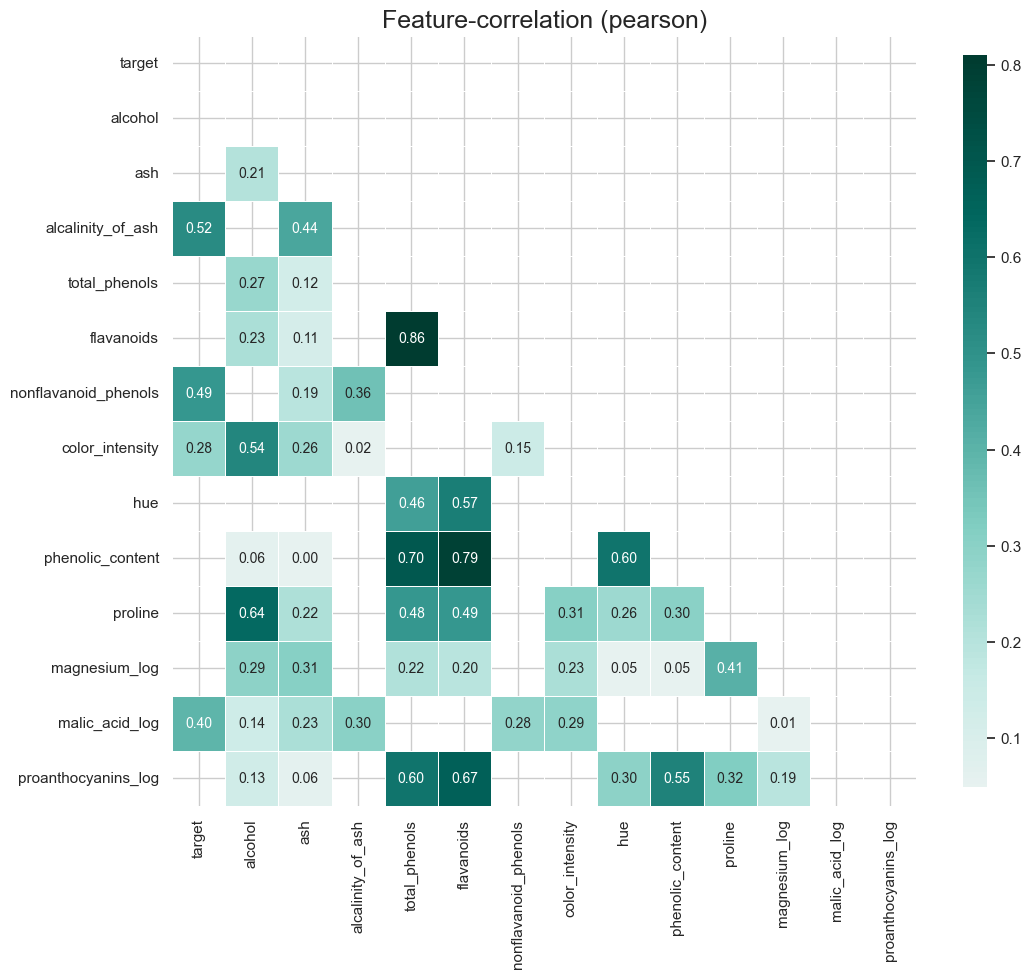

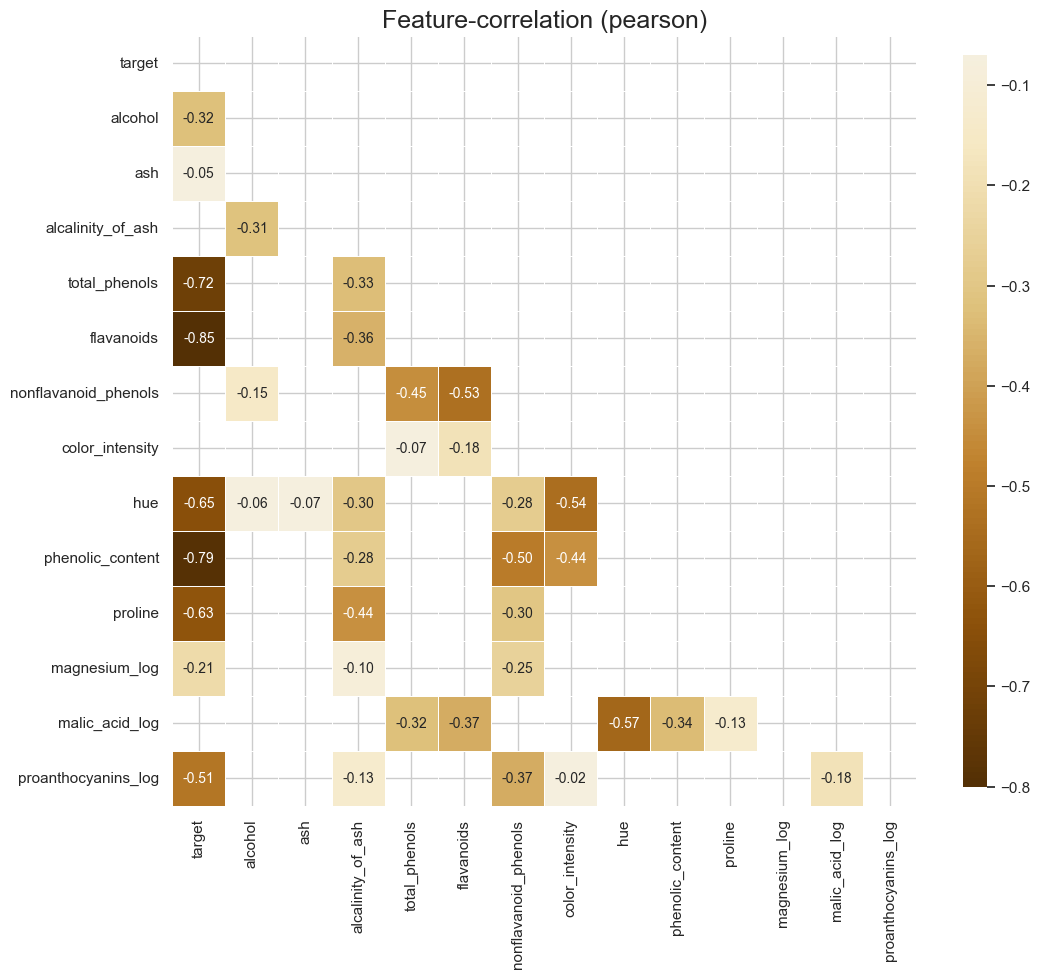

In [42]:
klib.corr_plot(df, split='pos')
klib.corr_plot(df, split='neg')

In [43]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical columns and the target variable
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

# Extract the features and the target variable
X = df[numerical_columns].drop(columns=['target'])
y = df['target']

# Add a constant column for the intercept term
X = sm.add_constant(X)

# Calculate VIF for each feature, excluding the constant term
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exclude the constant term from the VIF data
vif_data = vif_data[vif_data['feature'] != 'const']

print(vif_data)

                 feature       VIF
1                alcohol  2.419345
2                    ash  2.205025
3      alcalinity_of_ash  2.322346
4          total_phenols  4.270437
5             flavanoids  7.166755
6   nonflavanoid_phenols  1.796991
7        color_intensity  3.161560
8                    hue  2.880830
9       phenolic_content  3.875885
10               proline  2.776766
11         magnesium_log  1.442856
12        malic_acid_log  1.700128
13   proanthocyanins_log  2.077452


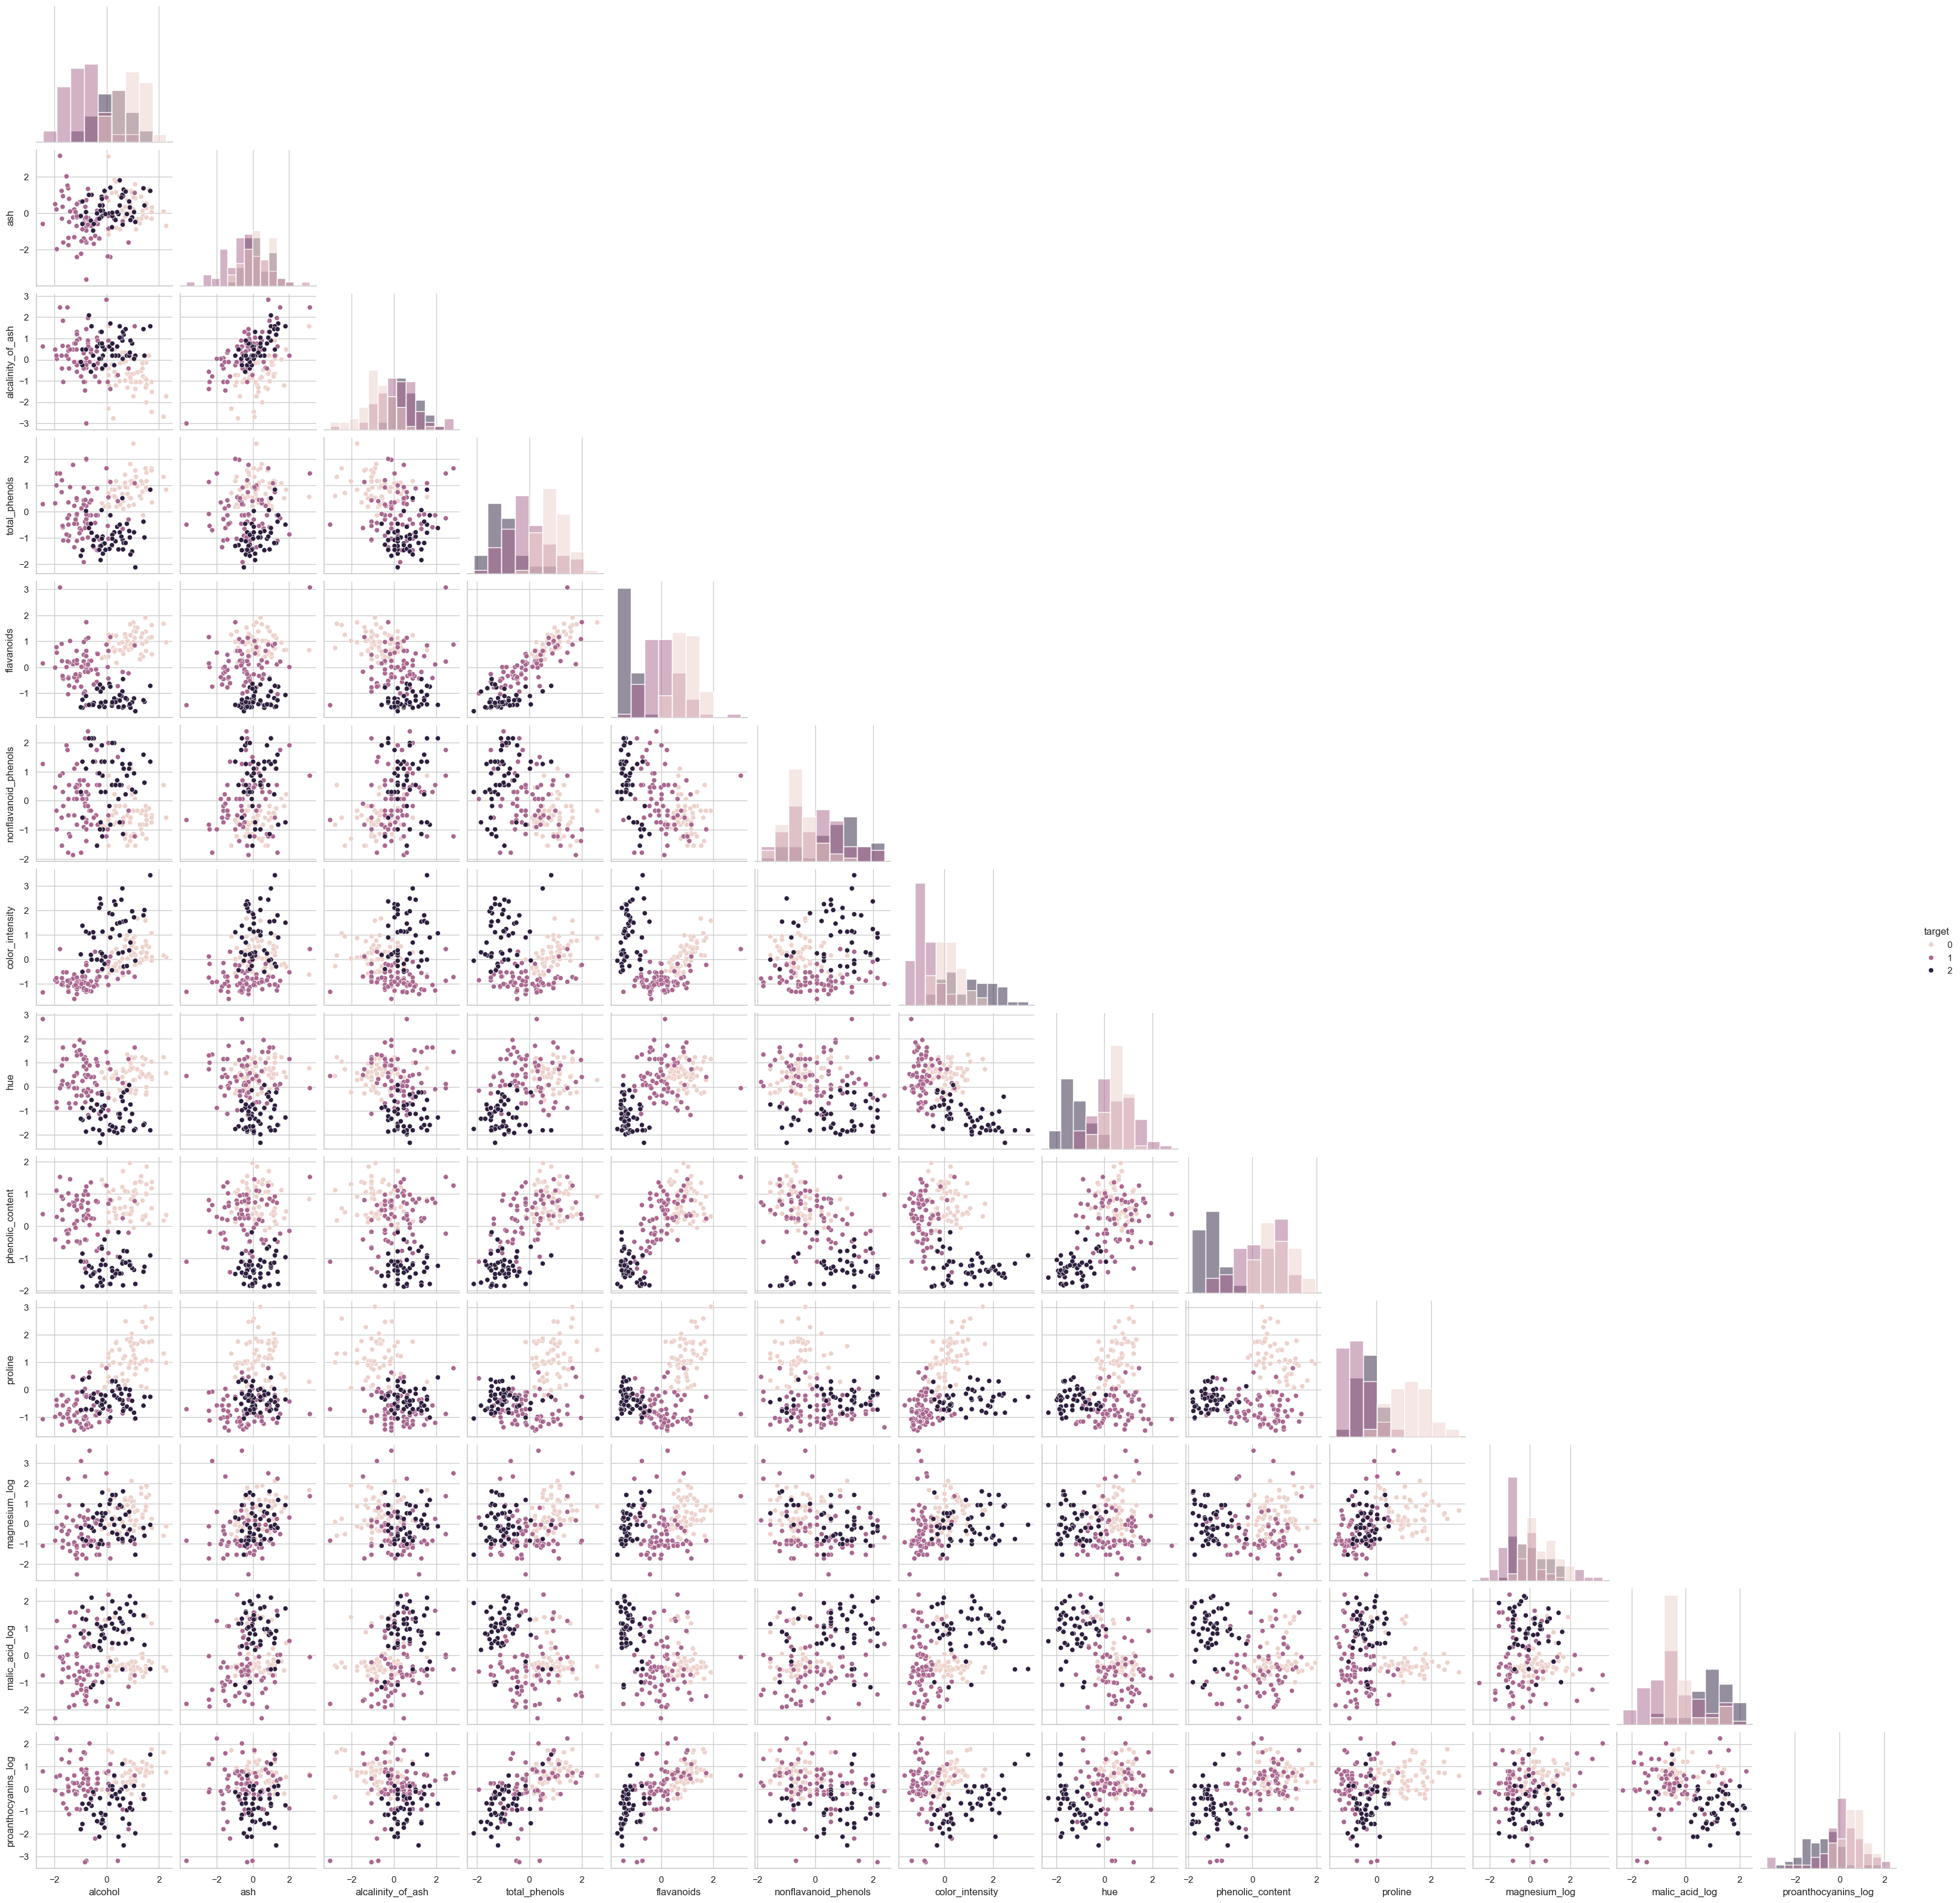

In [44]:
sns.pairplot(df, hue='target',corner=True,diag_kind = "hist")
plt.show()


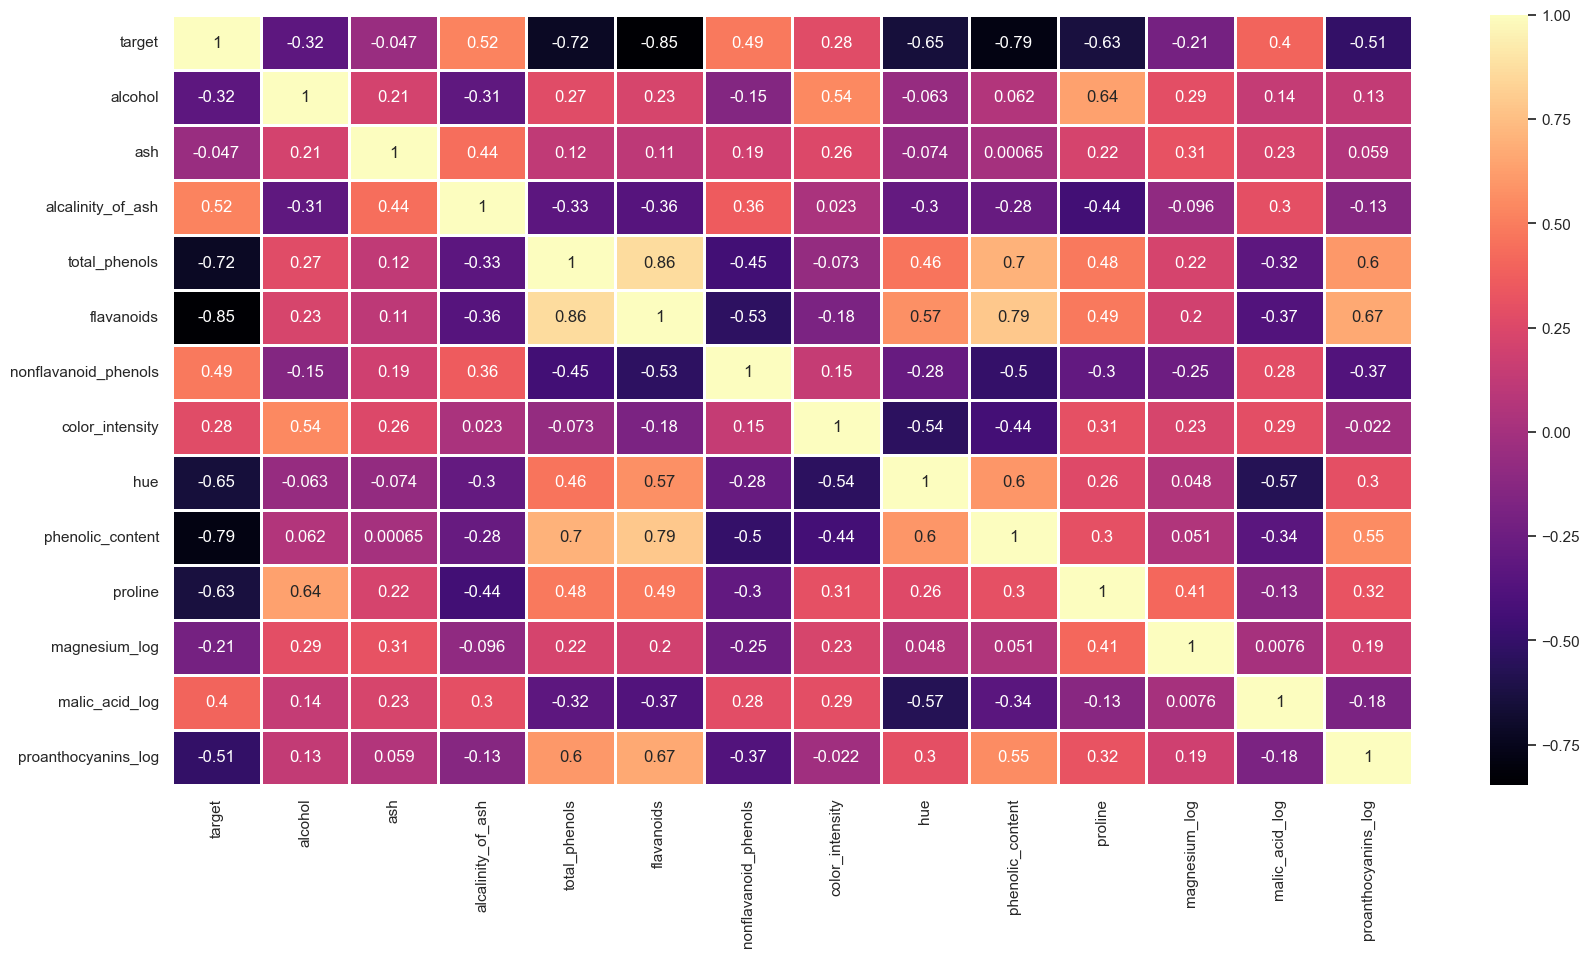

In [45]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

- **Flavanoids and Total Phenols**: These two have a very high positive correlation (0.86), suggesting that wines with high levels of flavanoids also tend to have high levels of total phenols. Since these are both related to the antioxidant properties of wine, this relationship is expected.

- **Color Intensity and Hue**: There’s a moderate negative correlation (-0.52) between color intensity and hue. This may imply that wines with a more intense color could have a darker hue, which is less on the red/purple spectrum.

- **Nonflavanoid Phenols and Flavanoids**: There is a strong negative correlation (-0.54) here, which could suggest that wines that are high in flavanoids, which are typically associated with quality, are low in nonflavanoid phenols.

- **Target Variable Correlations**: The target variable has significant negative correlations with several features:
  - **Flavanoids** (-0.85)
  - **Total Phenols** (-0.72)
  - **phenolic_content** (-0.79)

  This pattern could indicate that these negatively correlated features play a significant role in the differentiation of the target classes. For example, if the target represents wine quality, higher values of these features might correspond to lower quality categories, or vice versa.

- **Alcohol**: Alcohol has a moderately negative correlation with the target (-0.33), suggesting a possible relationship between alcohol content and the target classes, which might be an interesting angle for further analysis.

- **Multicollinearity**: High correlations between features such as flavanoids and total phenols could indicate multicollinearity, which might affect certain types of analyses, such as regression.



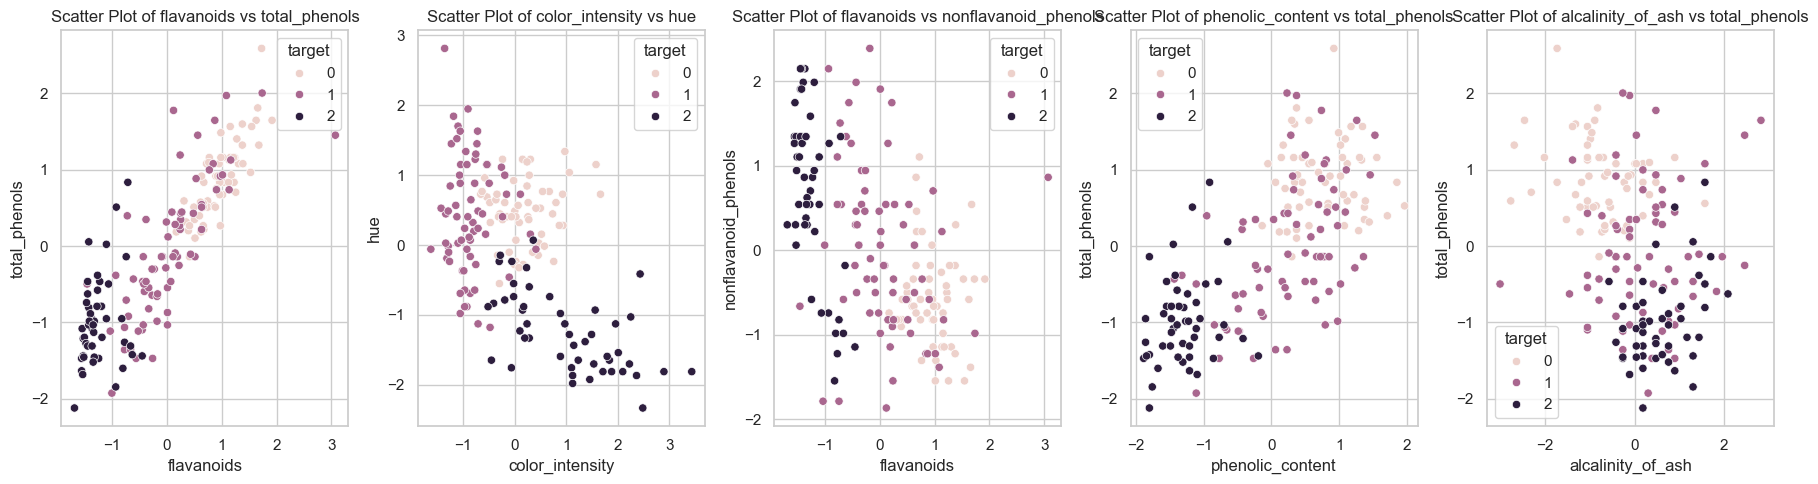

In [46]:
# Variables identified as having strong correlations
pairs_to_plot = [
    ('flavanoids', 'total_phenols'),
    ('color_intensity', 'hue'),
    ('flavanoids', 'nonflavanoid_phenols'),
    ('phenolic_content', 'total_phenols'),
    ('alcalinity_of_ash', 'total_phenols')
]

# Create scatter plots for each pair
fig, axs = plt.subplots(1, 5, figsize=(18, 5))

for i, pair in enumerate(pairs_to_plot):
    sns.scatterplot(data=df, x=pair[0], y=pair[1], hue='target', ax=axs[i])
    axs[i].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')

plt.tight_layout()
plt.show()

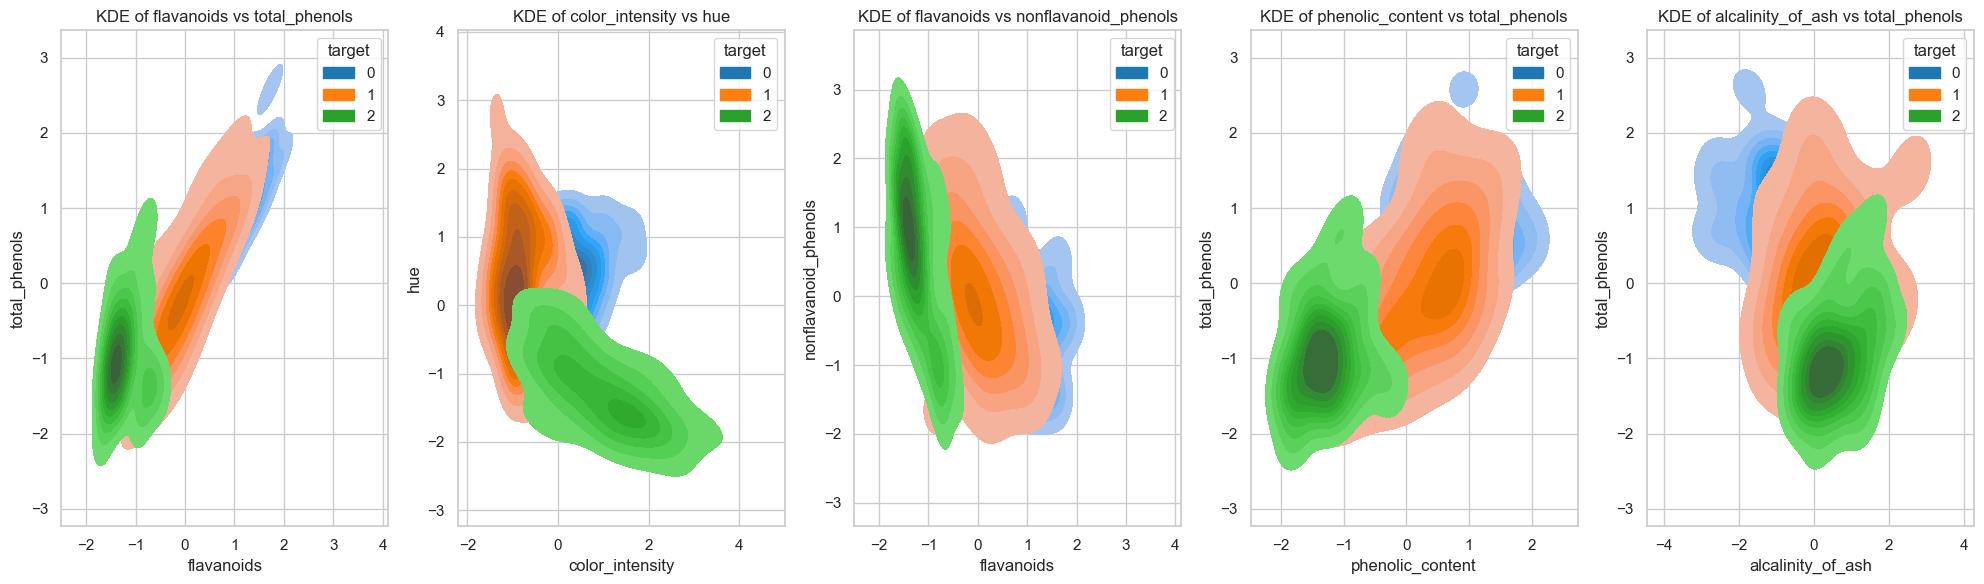

In [47]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

for i, pair in enumerate(pairs_to_plot):
    sns.kdeplot(
        data=df,
        x=pair[0],
        y=pair[1],
        hue="target",
        fill=True,
        palette="tab10",
        ax=axes[i]
    )
    axes[i].set_title(f'KDE of {pair[0]} vs {pair[1]}')

plt.tight_layout()
plt.show()


The Kernel Density Estimation (KDE) plots illustrate the density of wine data points in the feature space, colored by the target class.

- **Flavanoids vs Total Phenols**: The KDE shows a strong positive correlation. High density regions indicate that wines with higher flavanoid levels also have higher total phenol levels, particularly for target class 1.

- **Color Intensity vs Hue**: The KDE indicates an inverse relationship between color intensity and hue. Higher color intensity is associated with lower hue values, especially for target class 2, suggesting these wines are darker.

- **Flavanoids vs Nonflavanoid Phenols**: There is a noticeable inverse correlation. Wines with higher levels of flavanoids tend to have lower levels of nonflavanoid phenols, which is most evident in target class 1.

These KDE plots help to visualize where the majority of data points for each class lie in the feature space and can be useful for identifying how well-separated the classes are based on these feature combinations.



# Final Data Frame for ML

In [48]:
df

target   alcohol       ash  alcalinity_of_ash  total_phenols  flavanoids  \
0         0  1.531993  0.233643          -1.184173       0.833176    1.043587   
1         0  0.256487 -0.821143          -2.767591       0.589876    0.742258   
2         0  0.206952  1.106570          -0.230809       0.833176    1.224385   
4         0  0.306021  1.834009           0.477618       0.833176    0.671948   
5         0  1.494843  0.306387          -1.317995       1.595516    1.375050   
..      ...       ...       ...                ...            ...         ...   
173       2  0.888048  0.306387           0.333511      -0.983463   -1.417270   
174       2  0.504158  0.415503           1.037566      -0.788823   -1.276649   
175       2  0.343172 -0.384680           0.187635      -1.129443   -1.336915   
176       2  0.219336  0.015412           0.187635      -1.032123   -1.346960   
177       2  1.408158  1.361174           1.441704      -0.383323   -1.266605   

     nonflavanoid_phenols  color_intensity       hue  phenolic_content  \
0               -0.663172         0.257989  0.404372          1.851508   
1               -0.823858        -0.286145  0.445317          1.118266   
2               -0.502485         0.275263  0.363229          0.793947   
4                0.220603        -0.312056  0.404372          0.455528   
5               -0.181113         0.737345  0.445317          0.342721   
..                    ...              ...       ...               ...   
173              1.265065         1.147605 -1.435670         -1.222469   
174              0.541976         0.974864 -1.128779         -1.476283   
175              0.541976         2.227237 -1.702592         -1.476283   
176              1.345408         1.838569 -1.648329         -1.391678   
177              1.586438         1.795384 -1.594516         -1.419880   

      proline  magnesium_log  malic_acid_log  proanthocyanins_log  
0    1.036500       1.843585       -0.462875             1.111001  
1    0.988253       0.094316       -0.374019            -0.368303  
2    1.422475       0.167139        0.250654             1.631404  
4   -0.024932       1.305650        0.456619             0.526810  
5    2.274838       0.923723       -0.399045             0.728217  
..        ...            ...             ...                  ...  
173 -0.008850      -0.281079        2.184136            -0.847911  
174  0.023315       0.239244        1.368838            -0.122310  
175  0.296714       1.428654        1.569088            -0.232897  
176  0.312796       1.428654        0.456619            -0.033691  
177 -0.587813      -0.204444        1.473928            -0.232897  

[177 rows x 14 columns]

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your DataFrame and 'target' is the column to predict
# df = pd.read_csv('your_data.csv') # Uncomment this if you need to read from a file

# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9444444444444444
Confusion Matrix:
[[12  0  0]
 [ 0 13  1]
 [ 0  1  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.93      0.93        14
           2       0.90      0.90      0.90        10

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36

